# Finalized results (LSWI) for train, test, val and corresponding figures

## Importing Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ # change this to the root working directory

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd

In [ ]:
file_path = 'Modeling VIs in Tallgrass/data/P13_Cleaned_Data.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,DATE,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
0,6,2000-02-18,52.10875,71.93625,4.46000,12.16500,0.00000,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100,0.254,-0.111
1,7,2000-02-26,48.71250,66.61750,5.25500,16.66875,0.00000,12.51125,14.832385,0.78,49.21875,49.43125,1.671738,1.570663,1.491400,0.211,-0.136
2,8,2000-03-05,50.03750,72.90625,4.11375,14.25750,0.00000,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662,0.231,-0.092
3,9,2000-03-13,47.88250,81.58250,3.14125,15.82625,0.00000,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650,0.170,-0.205
4,10,2000-03-21,57.95000,75.16625,5.15500,6.97000,0.00000,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475,0.187,-0.206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1090,2023-09-14,71.42375,73.00250,8.62500,0.00000,6.97375,8.59875,15.427500,0.99,71.31000,71.28000,1.520763,3.208450,3.473537,0.379,0.084
1070,1091,2023-09-22,75.57250,66.09000,12.62500,0.00000,11.76625,9.57000,18.105000,0.39,72.30125,75.01625,1.620875,2.699000,3.452688,0.446,0.163
1071,1092,2023-09-30,68.66625,63.53250,10.45000,2.35625,7.10750,8.96625,15.098750,1.52,69.67000,72.41000,1.813212,2.058113,3.441438,0.426,0.125
1072,1093,2023-10-08,61.79500,65.17125,7.83500,4.42000,1.91250,12.27000,15.991250,0.00,64.46500,64.92125,1.711912,1.664287,3.413925,0.401,0.105


In [ ]:
# Filter observations where EVI < -0.07
filtered_indices = df[df['MODIS_EVI'] < -0.07].index
filtered_indices

Index([456], dtype='int64')

# LSWI

## Outlier Removal

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

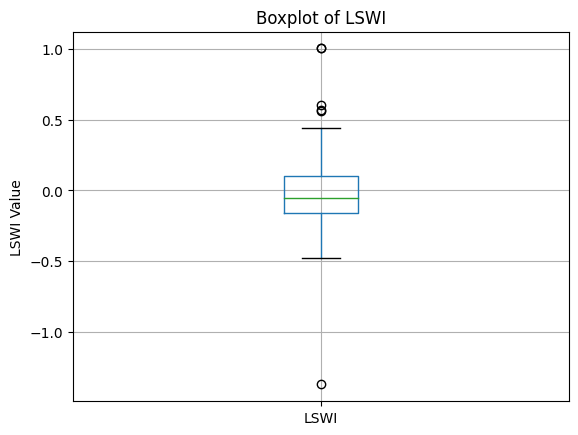

In [ ]:
# df as dataframe
df.boxplot(column='LSWI')

# Set plot labels
plt.title('Boxplot of LSWI')
plt.ylabel('LSWI Value')

# Show the plot
plt.show()

In [ ]:
values_to_drop = [-1.37, 1.003, 0.605, 0.565, 0.562]

# Create a boolean mask to identify rows where the specified values are present
mask = df['LSWI'].isin(values_to_drop)

# Use the boolean mask to drop the rows
lswi_df = df[~mask]

# Display the filtered DataFrame
display(lswi_df)

,Unnamed: 0,DATE,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
0,6,2000-02-18,52.10875,71.93625,4.46000,12.16500,0.00000,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100,0.254,-0.111
1,7,2000-02-26,48.71250,66.61750,5.25500,16.66875,0.00000,12.51125,14.832385,0.78,49.21875,49.43125,1.671738,1.570663,1.491400,0.211,-0.136
2,8,2000-03-05,50.03750,72.90625,4.11375,14.25750,0.00000,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662,0.231,-0.092
3,9,2000-03-13,47.88250,81.58250,3.14125,15.82625,0.00000,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650,0.170,-0.205
4,10,2000-03-21,57.95000,75.16625,5.15500,6.97000,0.00000,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475,0.187,-0.206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1090,2023-09-14,71.42375,73.00250,8.62500,0.00000,6.97375,8.59875,15.427500,0.99,71.31000,71.28000,1.520763,3.208450,3.473537,0.379,0.084
1070,1091,2023-09-22,75.57250,66.09000,12.62500,0.00000,11.76625,9.57000,18.105000,0.39,72.30125,75.01625,1.620875,2.699000,3.452688,0.446,0.163
1071,1092,2023-09-30,68.66625,63.53250,10.45000,2.35625,7.10750,8.96625,15.098750,1.52,69.67000,72.41000,1.813212,2.058113,3.441438,0.426,0.125
1072,1093,2023-10-08,61.79500,65.17125,7.83500,4.42000,1.91250,12.27000,15.991250,0.00,64.46500,64.92125,1.711912,1.664287,3.413925,0.401,0.105


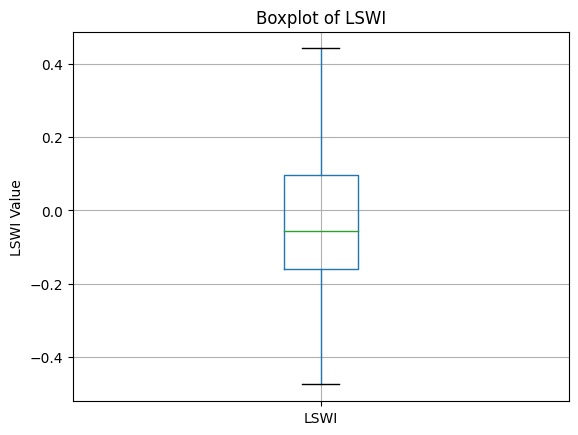

In [ ]:
# Show plot with removed outliers
lswi_df.boxplot(column='LSWI')

# Set plot labels
plt.title('Boxplot of LSWI')
plt.ylabel('LSWI Value')

# Show the plot
plt.show()

## Train Test Splitting

In [ ]:
# Training data from 2000-2021 and testing data from 2022-2023
train_test_lswi = lswi_df[lswi_df['DATE'] < '2022-01-01']
validation_lswi = lswi_df[lswi_df['DATE'] >= '2022-01-01']

In [ ]:
X_lswi = train_test_lswi[['Tavg_mean', 'Havg_mean', 'Vdef_mean', 'Hdeg_mean', 'Cdeg_mean',
       'Wspd_mean', 'Atot_mean', 'Rain_sum', 'Savg_mean', 'Bavg_mean',
       'Tr05_mean', 'Tr25_mean', 'Tr60_mean']]
y_lswi = train_test_lswi[['LSWI']]

In [ ]:
X_train_lswi, X_test_lswi, y_train_lswi, y_test_lswi = train_test_split(X_lswi, y_lswi, test_size=0.2, random_state=42)

In [ ]:
X_val_lswi = validation_lswi[['Tavg_mean', 'Havg_mean', 'Vdef_mean', 'Hdeg_mean', 'Cdeg_mean',
       'Wspd_mean', 'Atot_mean', 'Rain_sum', 'Savg_mean', 'Bavg_mean',
       'Tr05_mean', 'Tr25_mean', 'Tr60_mean']]
y_val_lswi = validation_lswi[['LSWI']]

In [ ]:
len(X_train_lswi), len(X_test_lswi), len(X_val_lswi)

(797, 200, 71)

## Importing Models

In [ ]:
import pickle

# Load the trained model
models_base_path = 'Modeling VIs in Tallgrass/models/lswi/'

with open(models_base_path + 'linear_regression_lswi.pkl', 'rb') as lr_file:
    lswi_lr_model = pickle.load(lr_file)

with open(models_base_path + 'tuned_linear_lswi.pkl', 'rb') as tuned_lr_file:
    lswi_tuned_lr_model = pickle.load(tuned_lr_file)

with open(models_base_path + 'bayesian_ridge_lswi.pkl', 'rb') as br_file:
    lswi_br_model = pickle.load(br_file)

with open(models_base_path + 'tuned_br_lswi.pkl', 'rb') as tuned_br_file:
    lswi_tuned_br_model = pickle.load(tuned_br_file)

with open(models_base_path + 'elastic_net_lswi.pkl', 'rb') as en_file:
    lswi_en_model = pickle.load(en_file)

with open(models_base_path + 'tuned_en_lswi.pkl', 'rb') as tuned_en_file:
    lswi_tuned_en_model = pickle.load(tuned_en_file)

with open(models_base_path + 'xgboost_model_lswi.pkl', 'rb') as xgboost_file:
    lswi_xgboost_model = pickle.load(xgboost_file)

with open(models_base_path + 'tuned_xgboost_lswi.pkl', 'rb') as tuned_xgboost_file:
    lswi_tuned_xgboost_model = pickle.load(tuned_xgboost_file)

with open(models_base_path + 'random_forest_lswi.pkl', 'rb') as rf_file:
    lswi_rf_model = pickle.load(rf_file)

with open(models_base_path + 'tuned_rf_lswi.pkl', 'rb') as tuned_rf_file:
    lswi_tuned_rf_model = pickle.load(tuned_rf_file)

with open(models_base_path + 'decision_tree_lswi.pkl', 'rb') as dt_file:
    lswi_dt_model = pickle.load(dt_file)

with open(models_base_path + 'svr_lswi.pkl', 'rb') as svr_file:
    lswi_svr_model = pickle.load(svr_file)

with open(models_base_path + 'tuned_svr_lswi.pkl', 'rb') as tuned_svr_file:
    lswi_tuned_svr_model = pickle.load(tuned_svr_file)

with open(models_base_path + 'knn_lswi.pkl', 'rb') as knn_file:
    lswi_knn_model = pickle.load(knn_file)

with open(models_base_path + 'tuned_knn_lswi.pkl', 'rb') as tuned_knn_file:
    lswi_tuned_knn_model = pickle.load(tuned_knn_file)

with open(models_base_path + 'ann_lswi.pkl', 'rb') as ann_file:
    lswi_ann_model = pickle.load(ann_file)

with open(models_base_path + 'tuned_ann_lswi.pkl', 'rb') as tuned_ann_file:
    lswi_tuned_ann_model = pickle.load(tuned_ann_file)

with open(models_base_path + 'cnn_lswi.pkl', 'rb') as cnn_file:
    lswi_cnn_model = pickle.load(cnn_file)

with open(models_base_path + 'tuned_cnn_lswi.pkl', 'rb') as tuned_cnn_file:
    lswi_tuned_cnn_model = pickle.load(tuned_cnn_file)

with open(models_base_path + 'rnn_lswi.pkl', 'rb') as rnn_file:
    lswi_rnn_model = pickle.load(rnn_file)

with open(models_base_path + 'tuned_rnn_lswi.pkl', 'rb') as tuned_rnn_file:
    lswi_tuned_rnn_model = pickle.load(tuned_rnn_file)

with open(models_base_path + 'lstm_lswi.pkl', 'rb') as lstm_file:
    lswi_lstm_model = pickle.load(lstm_file)

with open(models_base_path + 'tuned_lstm_lswi.pkl', 'rb') as tuned_lstm_file:
    lswi_tuned_lstm_model = pickle.load(tuned_lstm_file)

In [ ]:
# For ANN and CNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_stand_lswi = scaler.fit_transform(X_train_lswi)
X_test_stand_lswi = scaler.transform(X_test_lswi)
X_val_stand_lswi = scaler.transform(X_val_lswi)

# For RNN
X_train_rnn_lswi = X_train_stand_lswi.reshape(X_train_stand_lswi.shape[0], 1, X_train_stand_lswi.shape[1])
X_test_rnn_lswi = X_test_stand_lswi.reshape(X_test_stand_lswi.shape[0], 1, X_test_stand_lswi.shape[1])
X_val_rnn_lswi = X_val_stand_lswi.reshape(X_val_stand_lswi.shape[0], 1, X_val_stand_lswi.shape[1])

# For LSTM
timesteps=1
X_train_lstm_lswi = X_train_stand_lswi.reshape(X_train_stand_lswi.shape[0], timesteps, X_train_stand_lswi.shape[1])
X_test_lstm_lswi = X_test_stand_lswi.reshape(X_test_stand_lswi.shape[0], timesteps, X_test_stand_lswi.shape[1])
X_val_lstm_lswi = X_val_stand_lswi.reshape(X_val_stand_lswi.shape[0], timesteps, X_val_stand_lswi.shape[1])

In [ ]:
# Fit Bayesian model first
lswi_br_model.fit(X_train_lswi, y_train_lswi)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [ ]:
lswi_lr_train_pred = lswi_lr_model.predict(X_train_lswi)
lswi_lr_tuned_train_pred = lswi_tuned_lr_model.predict(X_train_lswi)
lswi_br_train_pred = lswi_br_model.predict(X_train_lswi)
lswi_br_tuned_train_pred = lswi_tuned_br_model.predict(X_train_lswi)
lswi_en_train_pred = lswi_en_model.predict(X_train_lswi)
lswi_en_tuned_train_pred = lswi_tuned_en_model.predict(X_train_lswi)
lswi_xgboost_train_pred = lswi_xgboost_model.predict(X_train_lswi)
lswi_xgboost_tuned_train_pred = lswi_tuned_xgboost_model.predict(X_train_lswi)
lswi_rf_train_pred = lswi_rf_model.predict(X_train_lswi)
lswi_rf_tuned_train_pred = lswi_tuned_rf_model.predict(X_train_lswi)
lswi_dt_train_pred = lswi_dt_model.predict(X_train_lswi)
lswi_svr_train_pred = lswi_svr_model.predict(X_train_lswi)
lswi_svr_tuned_train_pred = lswi_tuned_svr_model.predict(X_train_lswi)
lswi_knn_train_pred = lswi_knn_model.predict(X_train_lswi)
lswi_knn_tuned_train_pred = lswi_tuned_knn_model.predict(X_train_lswi)
lswi_ann_train_pred = lswi_ann_model.predict(X_train_stand_lswi)
lswi_ann_tuned_train_pred = lswi_tuned_ann_model.predict(X_train_stand_lswi)
lswi_cnn_train_pred = lswi_cnn_model.predict(X_train_stand_lswi)
lswi_cnn_tuned_train_pred = lswi_tuned_cnn_model.predict(X_train_stand_lswi)
lswi_rnn_train_pred = lswi_rnn_model.predict(X_train_rnn_lswi)
lswi_rnn_tuned_train_pred = lswi_tuned_rnn_model.predict(X_train_rnn_lswi)
lswi_lstm_train_pred = lswi_lstm_model.predict(X_train_lstm_lswi)
lswi_lstm_tuned_train_pred = lswi_tuned_lstm_model.predict(X_train_lstm_lswi)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
lswi_lr_test_pred = lswi_lr_model.predict(X_test_lswi)
lswi_lr_tuned_test_pred = lswi_tuned_lr_model.predict(X_test_lswi)
lswi_br_test_pred = lswi_br_model.predict(X_test_lswi)
lswi_br_tuned_test_pred = lswi_tuned_br_model.predict(X_test_lswi)
lswi_en_test_pred = lswi_en_model.predict(X_test_lswi)
lswi_en_tuned_test_pred = lswi_tuned_en_model.predict(X_test_lswi)
lswi_xgboost_test_pred = lswi_xgboost_model.predict(X_test_lswi)
lswi_xgboost_tuned_test_pred = lswi_tuned_xgboost_model.predict(X_test_lswi)
lswi_rf_test_pred = lswi_rf_model.predict(X_test_lswi)
lswi_rf_tuned_test_pred = lswi_tuned_rf_model.predict(X_test_lswi)
lswi_dt_test_pred = lswi_dt_model.predict(X_test_lswi)
lswi_svr_test_pred = lswi_svr_model.predict(X_test_lswi)
lswi_svr_tuned_test_pred = lswi_tuned_svr_model.predict(X_test_lswi)
lswi_knn_test_pred = lswi_knn_model.predict(X_test_lswi)
lswi_knn_tuned_test_pred = lswi_tuned_knn_model.predict(X_test_lswi)
lswi_ann_test_pred = lswi_ann_model.predict(X_test_stand_lswi)
lswi_ann_tuned_test_pred = lswi_tuned_ann_model.predict(X_test_stand_lswi)
lswi_cnn_test_pred = lswi_cnn_model.predict(X_test_stand_lswi)
lswi_cnn_tuned_test_pred = lswi_tuned_cnn_model.predict(X_test_stand_lswi)
lswi_rnn_test_pred = lswi_rnn_model.predict(X_test_rnn_lswi)
lswi_rnn_tuned_test_pred = lswi_tuned_rnn_model.predict(X_test_rnn_lswi)
lswi_lstm_test_pred = lswi_lstm_model.predict(X_test_lstm_lswi)
lswi_lstm_tuned_test_pred = lswi_tuned_lstm_model.predict(X_test_lstm_lswi)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
lswi_lr_val_pred = lswi_lr_model.predict(X_val_lswi)
lswi_lr_tuned_val_pred = lswi_tuned_lr_model.predict(X_val_lswi)
lswi_br_val_pred = lswi_br_model.predict(X_val_lswi)
lswi_br_tuned_val_pred = lswi_tuned_br_model.predict(X_val_lswi)
lswi_en_val_pred = lswi_en_model.predict(X_val_lswi)
lswi_en_tuned_val_pred = lswi_tuned_en_model.predict(X_val_lswi)
lswi_xgboost_val_pred = lswi_xgboost_model.predict(X_val_lswi)
lswi_xgboost_tuned_val_pred = lswi_tuned_xgboost_model.predict(X_val_lswi)
lswi_rf_val_pred = lswi_rf_model.predict(X_val_lswi)
lswi_rf_tuned_val_pred = lswi_tuned_rf_model.predict(X_val_lswi)
lswi_dt_val_pred = lswi_dt_model.predict(X_val_lswi)
lswi_svr_val_pred = lswi_svr_model.predict(X_val_lswi)
lswi_svr_tuned_val_pred = lswi_tuned_svr_model.predict(X_val_lswi)
lswi_knn_val_pred = lswi_knn_model.predict(X_val_lswi)
lswi_knn_tuned_val_pred = lswi_tuned_knn_model.predict(X_val_lswi)
lswi_ann_val_pred = lswi_ann_model.predict(X_val_stand_lswi)
lswi_ann_tuned_val_pred = lswi_tuned_ann_model.predict(X_val_stand_lswi)
lswi_cnn_val_pred = lswi_cnn_model.predict(X_val_stand_lswi)
lswi_cnn_tuned_val_pred = lswi_tuned_cnn_model.predict(X_val_stand_lswi)
lswi_rnn_val_pred = lswi_rnn_model.predict(X_val_rnn_lswi)
lswi_rnn_tuned_val_pred = lswi_tuned_rnn_model.predict(X_val_rnn_lswi)
lswi_lstm_val_pred = lswi_lstm_model.predict(X_val_lstm_lswi)
lswi_lstm_tuned_val_pred = lswi_tuned_lstm_model.predict(X_val_lstm_lswi)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


## Training Results

In [ ]:
actual_lswi_train = y_train_lswi[['LSWI']]

# Calculate evaluation metrics
lswi_mse_lr_train = mean_squared_error(actual_lswi_train, lswi_lr_train_pred)
lswi_mae_lr_train = mean_absolute_error(actual_lswi_train, lswi_lr_train_pred)
lswi_rmse_lr_train = mean_squared_error(actual_lswi_train, lswi_lr_train_pred, squared=False)
lswi_r2_lr_train = r2_score(actual_lswi_train, lswi_lr_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lr_train)
print('MAE:', lswi_mae_lr_train)
print('RMSE:', lswi_rmse_lr_train)
print('R2 score:', lswi_r2_lr_train)

MSE: 0.009254178331430088
MAE: 0.07331595539710024
RMSE: 0.09619863996663408
R2 score: 0.618762222619321


In [ ]:
# Calculate evaluation metrics
lswi_mse_lr_tuned_train = mean_squared_error(actual_lswi_train, lswi_lr_tuned_train_pred)
lswi_mae_lr_tuned_train = mean_absolute_error(actual_lswi_train, lswi_lr_tuned_train_pred)
lswi_rmse_lr_tuned_train = mean_squared_error(actual_lswi_train, lswi_lr_tuned_train_pred, squared=False)
lswi_r2_lr_tuned_train = r2_score(actual_lswi_train, lswi_lr_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lr_tuned_train)
print('MAE:', lswi_mae_lr_tuned_train)
print('RMSE:', lswi_rmse_lr_tuned_train)
print('R2 score:', lswi_r2_lr_tuned_train)

MSE: 0.009254178331430088
MAE: 0.07331595539710024
RMSE: 0.09619863996663408
R2 score: 0.618762222619321


In [ ]:
# Calculate evaluation metrics
lswi_mse_br_train = mean_squared_error(actual_lswi_train, lswi_br_train_pred)
lswi_mae_br_train = mean_absolute_error(actual_lswi_train, lswi_br_train_pred)
lswi_rmse_br_train = mean_squared_error(actual_lswi_train, lswi_br_train_pred, squared=False)
lswi_r2_br_train = r2_score(actual_lswi_train, lswi_br_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_br_train)
print('MAE:', lswi_mae_br_train)
print('RMSE:', lswi_rmse_br_train)
print('R2 score:', lswi_r2_br_train)

MSE: 0.009296035861899537
MAE: 0.0733600985886709
RMSE: 0.09641595232065873
R2 score: 0.6170378478221962


In [ ]:
# Calculate evaluation metrics
lswi_mse_br_tuned_train = mean_squared_error(actual_lswi_train, lswi_br_tuned_train_pred)
lswi_mae_br_tuned_train = mean_absolute_error(actual_lswi_train, lswi_br_tuned_train_pred)
lswi_rmse_br_tuned_train = mean_squared_error(actual_lswi_train, lswi_br_tuned_train_pred, squared=False)
lswi_r2_br_tuned_train = r2_score(actual_lswi_train, lswi_br_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_br_tuned_train)
print('MAE:', lswi_mae_br_tuned_train)
print('RMSE:', lswi_rmse_br_tuned_train)
print('R2 score:', lswi_r2_br_tuned_train)

MSE: 0.009263033502524342
MAE: 0.07331048984471064
RMSE: 0.09624465441012472
R2 score: 0.6183974224582054


In [ ]:
# Calculate evaluation metrics
lswi_mse_en_train = mean_squared_error(actual_lswi_train, lswi_en_train_pred)
lswi_mae_en_train = mean_absolute_error(actual_lswi_train, lswi_en_train_pred)
lswi_rmse_en_train = mean_squared_error(actual_lswi_train, lswi_en_train_pred, squared=False)
lswi_r2_en_train = r2_score(actual_lswi_train, lswi_en_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_en_train)
print('MAE:', lswi_mae_en_train)
print('RMSE:', lswi_rmse_en_train)
print('R2 score:', lswi_r2_en_train)

MSE: 0.013964206417302684
MAE: 0.09452443576841936
RMSE: 0.1181702433665205
R2 score: 0.42472655845234863


In [ ]:
# Calculate evaluation metrics
lswi_mse_en_tuned_train = mean_squared_error(actual_lswi_train, lswi_en_tuned_train_pred)
lswi_mae_en_tuned_train = mean_absolute_error(actual_lswi_train, lswi_en_tuned_train_pred)
lswi_rmse_en_tuned_train = mean_squared_error(actual_lswi_train, lswi_en_tuned_train_pred, squared=False)
lswi_r2_en_tuned_train = r2_score(actual_lswi_train, lswi_en_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_en_tuned_train)
print('MAE:', lswi_mae_en_tuned_train)
print('RMSE:', lswi_rmse_en_tuned_train)
print('R2 score:', lswi_r2_en_tuned_train)

MSE: 0.009684125964945091
MAE: 0.07517897921700614
RMSE: 0.09840795681724669
R2 score: 0.6010499769373197


In [ ]:
# Calculate evaluation metrics
lswi_mse_x_train = mean_squared_error(actual_lswi_train, lswi_xgboost_train_pred)
lswi_mae_x_train = mean_absolute_error(actual_lswi_train, lswi_xgboost_train_pred)
lswi_rmse_x_train = mean_squared_error(actual_lswi_train, lswi_xgboost_train_pred, squared=False)
lswi_r2_x_train = r2_score(actual_lswi_train, lswi_xgboost_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_x_train)
print('MAE:', lswi_mae_x_train)
print('RMSE:', lswi_rmse_x_train)
print('R2 score:', lswi_r2_x_train)

MSE: 1.4201074637242204e-06
MAE: 0.000827943203389736
RMSE: 0.0011916826187052577
R2 score: 0.9999414968467516


In [ ]:
# Calculate evaluation metrics
lswi_mse_x_tuned_train = mean_squared_error(actual_lswi_train, lswi_xgboost_tuned_train_pred)
lswi_mae_x_tuned_train = mean_absolute_error(actual_lswi_train, lswi_xgboost_tuned_train_pred)
lswi_rmse_x_tuned_train = mean_squared_error(actual_lswi_train, lswi_xgboost_tuned_train_pred, squared=False)
lswi_r2_x_tuned_train = r2_score(actual_lswi_train, lswi_xgboost_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_x_tuned_train)
print('MAE:', lswi_mae_x_tuned_train)
print('RMSE:', lswi_rmse_x_tuned_train)
print('R2 score:', lswi_r2_x_tuned_train)

MSE: 0.0025438714232602164
MAE: 0.03801081189179181
RMSE: 0.05043680623572647
R2 score: 0.8952019452605384


In [ ]:
# Calculate evaluation metrics
lswi_mse_rf_train = mean_squared_error(actual_lswi_train, lswi_rf_train_pred)
lswi_mae_rf_train = mean_absolute_error(actual_lswi_train, lswi_rf_train_pred)
lswi_rmse_rf_train = mean_squared_error(actual_lswi_train, lswi_rf_train_pred, squared=False)
lswi_r2_rf_train = r2_score(actual_lswi_train, lswi_rf_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rf_train)
print('MAE:', lswi_mae_rf_train)
print('RMSE:', lswi_rmse_rf_train)
print('R2 score:', lswi_r2_rf_train)

MSE: 0.0011342965586809916
MAE: 0.024926389585947308
RMSE: 0.033679319450977505
R2 score: 0.9532711945421017


In [ ]:
# Calculate evaluation metrics
lswi_mse_rf_tuned_train = mean_squared_error(actual_lswi_train, lswi_rf_tuned_train_pred)
lswi_mae_rf_tuned_train = mean_absolute_error(actual_lswi_train, lswi_rf_tuned_train_pred)
lswi_rmse_rf_tuned_train = mean_squared_error(actual_lswi_train, lswi_rf_tuned_train_pred, squared=False)
lswi_r2_rf_tuned_train = r2_score(actual_lswi_train, lswi_rf_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rf_tuned_train)
print('MAE:', lswi_mae_rf_tuned_train)
print('RMSE:',lswi_rmse_rf_tuned_train)
print('R2 score:', lswi_r2_rf_tuned_train)

MSE: 0.002089429245537145
MAE: 0.0317931643136593
RMSE: 0.04571027505427139
R2 score: 0.9139232751915564


In [ ]:
# Calculate evaluation metrics
lswi_mse_dt_train = mean_squared_error(actual_lswi_train, lswi_dt_train_pred)
lswi_mae_dt_train = mean_absolute_error(actual_lswi_train, lswi_dt_train_pred)
lswi_rmse_dt_train = mean_squared_error(actual_lswi_train, lswi_dt_train_pred, squared=False)
lswi_r2_dt_train = r2_score(actual_lswi_train, lswi_dt_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_dt_train)
print('MAE:', lswi_mae_dt_train)
print('RMSE:', lswi_rmse_dt_train)
print('R2 score:', lswi_r2_dt_train)

MSE: 0.0
MAE: 0.0
RMSE: 0.0
R2 score: 1.0


In [ ]:
# Calculate evaluation metrics
lswi_mse_svr_train = mean_squared_error(actual_lswi_train, lswi_svr_train_pred)
lswi_mae_svr_train = mean_absolute_error(actual_lswi_train, lswi_svr_train_pred)
lswi_rmse_svr_train = mean_squared_error(actual_lswi_train, lswi_svr_train_pred, squared=False)
lswi_r2_svr_train = r2_score(actual_lswi_train, lswi_svr_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_svr_train)
print('MAE:', lswi_mae_svr_train)
print('RMSE:', lswi_rmse_svr_train)
print('R2 score:', lswi_r2_svr_train)

MSE: 0.009331831822670956
MAE: 0.0736961590390061
RMSE: 0.09660140693939688
R2 score: 0.6155631871840548


In [ ]:
# Calculate evaluation metrics
lswi_mse_svr_tuned_train = mean_squared_error(actual_lswi_train, lswi_svr_tuned_train_pred)
lswi_mae_svr_tuned_train = mean_absolute_error(actual_lswi_train, lswi_svr_tuned_train_pred)
lswi_rmse_svr_tuned_train = mean_squared_error(actual_lswi_train, lswi_svr_tuned_train_pred, squared=False)
lswi_r2_svr_tuned_train = r2_score(actual_lswi_train, lswi_svr_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_svr_tuned_train)
print('MAE:', lswi_mae_svr_tuned_train)
print('RMSE:', lswi_rmse_svr_tuned_train)
print('R2 score:', lswi_r2_svr_tuned_train)

MSE: 0.008226339664071573
MAE: 0.06895950964243476
RMSE: 0.09069917124247373
R2 score: 0.6611053583376842


In [ ]:
# Calculate evaluation metrics
lswi_mse_knn_train = mean_squared_error(actual_lswi_train, lswi_knn_train_pred)
lswi_mae_knn_train = mean_absolute_error(actual_lswi_train, lswi_knn_train_pred)
lswi_rmse_knn_train = mean_squared_error(actual_lswi_train, lswi_knn_train_pred, squared=False)
lswi_r2_knn_train = r2_score(actual_lswi_train, lswi_knn_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_knn_train)
print('MAE:', lswi_mae_knn_train)
print('RMSE:', lswi_rmse_knn_train)
print('R2 score:', lswi_r2_knn_train)

MSE: 0.006819665194479296
MAE: 0.062418820577164365
RMSE: 0.08258126418552392
R2 score: 0.719055122117807


In [ ]:
# Calculate evaluation metrics
lswi_mse_knn_tuned_train = mean_squared_error(actual_lswi_train, lswi_knn_tuned_train_pred)
lswi_mae_knn_tuned_train = mean_absolute_error(actual_lswi_train, lswi_knn_tuned_train_pred)
lswi_rmse_knn_tuned_train = mean_squared_error(actual_lswi_train, lswi_knn_tuned_train_pred, squared=False)
lswi_r2_knn_tuned_train = r2_score(actual_lswi_train, lswi_knn_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_knn_tuned_train)
print('MAE:', lswi_mae_knn_tuned_train)
print('RMSE:', lswi_rmse_knn_tuned_train)
print('R2 score:', lswi_r2_knn_tuned_train)

MSE: 0.007505945536502625
MAE: 0.06464296668060784
RMSE: 0.08663686014914568
R2 score: 0.690782920860951


In [ ]:
# Calculate evaluation metrics
lswi_mse_ann_train = mean_squared_error(actual_lswi_train, lswi_ann_train_pred)
lswi_mae_ann_train = mean_absolute_error(actual_lswi_train, lswi_ann_train_pred)
lswi_rmse_ann_train = mean_squared_error(actual_lswi_train, lswi_ann_train_pred, squared=False)
lswi_r2_ann_train = r2_score(actual_lswi_train, lswi_ann_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_ann_train)
print('MAE:', lswi_mae_ann_train)
print('RMSE:', lswi_rmse_ann_train)
print('R2 score:', lswi_r2_ann_train)

MSE: 0.0050371002897523064
MAE: 0.0522007085244911
RMSE: 0.07097253193843592
R2 score: 0.7924901757742563


In [ ]:
# Calculate evaluation metrics
lswi_mse_ann_tuned_train = mean_squared_error(actual_lswi_train, lswi_ann_tuned_train_pred)
lswi_mae_ann_tuned_train = mean_absolute_error(actual_lswi_train, lswi_ann_tuned_train_pred)
lswi_rmse_ann_tuned_train = mean_squared_error(actual_lswi_train, lswi_ann_tuned_train_pred, squared=False)
lswi_r2_ann_tuned_train = r2_score(actual_lswi_train, lswi_ann_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_ann_tuned_train)
print('MAE:', lswi_mae_ann_tuned_train)
print('RMSE:', lswi_rmse_ann_tuned_train)
print('R2 score:', lswi_r2_ann_tuned_train)

MSE: 0.004371227766277507
MAE: 0.04623322003176307
RMSE: 0.06611526122067057
R2 score: 0.8199216507012331


In [ ]:
# Calculate evaluation metrics
lswi_mse_cnn_train = mean_squared_error(actual_lswi_train, lswi_cnn_train_pred)
lswi_mae_cnn_train = mean_absolute_error(actual_lswi_train, lswi_cnn_train_pred)
lswi_rmse_cnn_train = mean_squared_error(actual_lswi_train, lswi_cnn_train_pred, squared=False)
lswi_r2_cnn_train = r2_score(actual_lswi_train, lswi_cnn_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_cnn_train)
print('MAE:', lswi_mae_cnn_train)
print('RMSE:', lswi_rmse_cnn_train)
print('R2 score:', lswi_r2_cnn_train)

MSE: 0.009320464494732882
MAE: 0.06922704946059018
RMSE: 0.09654255276681305
R2 score: 0.6160314788770245


In [ ]:
# Calculate evaluation metrics
lswi_mse_cnn_tuned_train = mean_squared_error(actual_lswi_train, lswi_cnn_tuned_train_pred)
lswi_mae_cnn_tuned_train = mean_absolute_error(actual_lswi_train, lswi_cnn_tuned_train_pred)
lswi_rmse_cnn_tuned_train = mean_squared_error(actual_lswi_train, lswi_cnn_tuned_train_pred, squared=False)
lswi_r2_cnn_tuned_train = r2_score(actual_lswi_train, lswi_cnn_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_cnn_tuned_train)
print('MAE:', lswi_mae_cnn_tuned_train)
print('RMSE:', lswi_rmse_cnn_tuned_train)
print('R2 score:', lswi_r2_cnn_tuned_train)

MSE: 0.006647896372232667
MAE: 0.061659049462513014
RMSE: 0.08153463296190562
R2 score: 0.7261313596476366


In [ ]:
# Calculate evaluation metrics
lswi_mse_rnn_train = mean_squared_error(actual_lswi_train, lswi_rnn_train_pred)
lswi_mae_rnn_train = mean_absolute_error(actual_lswi_train, lswi_rnn_train_pred)
lswi_rmse_rnn_train = mean_squared_error(actual_lswi_train, lswi_rnn_train_pred, squared=False)
lswi_r2_rnn_train = r2_score(actual_lswi_train, lswi_rnn_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rnn_train)
print('MAE:', lswi_mae_rnn_train)
print('RMSE:', lswi_rmse_rnn_train)
print('R2 score:', lswi_r2_rnn_train)

MSE: 0.004796075778693991
MAE: 0.05071194059786432
RMSE: 0.0692537058841907
R2 score: 0.8024194904685775


In [ ]:
# Calculate evaluation metrics
lswi_mse_rnn_tuned_train = mean_squared_error(actual_lswi_train, lswi_rnn_tuned_train_pred)
lswi_mae_rnn_tuned_train = mean_absolute_error(actual_lswi_train, lswi_rnn_tuned_train_pred)
lswi_rmse_rnn_tuned_train = mean_squared_error(actual_lswi_train, lswi_rnn_tuned_train_pred, squared=False)
lswi_r2_rnn_tuned_train = r2_score(actual_lswi_train, lswi_rnn_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rnn_tuned_train)
print('MAE:', lswi_mae_rnn_tuned_train)
print('RMSE:', lswi_rmse_rnn_tuned_train)
print('R2 score:', lswi_r2_rnn_tuned_train)

MSE: 0.006031918011754605
MAE: 0.059465592838627485
RMSE: 0.07766542352781323
R2 score: 0.7515073803652924


In [ ]:
# Calculate evaluation metrics
lswi_mse_lstm_train = mean_squared_error(actual_lswi_train, lswi_lstm_train_pred)
lswi_mae_lstm_train = mean_absolute_error(actual_lswi_train, lswi_lstm_train_pred)
lswi_rmse_lstm_train = mean_squared_error(actual_lswi_train, lswi_lstm_train_pred, squared=False)
lswi_r2_lstm_train = r2_score(actual_lswi_train, lswi_lstm_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lstm_train)
print('MAE:', lswi_mae_lstm_train)
print('RMSE:', lswi_rmse_lstm_train)
print('R2 score:', lswi_r2_lstm_train)

MSE: 0.0053445902545227785
MAE: 0.054203456521183815
RMSE: 0.07310670457983165
R2 score: 0.7798227312386546


In [ ]:
# Calculate evaluation metrics
lswi_mse_lstm_tuned_train = mean_squared_error(actual_lswi_train, lswi_lstm_tuned_train_pred)
lswi_mae_lstm_tuned_train = mean_absolute_error(actual_lswi_train, lswi_lstm_tuned_train_pred)
lswi_rmse_lstm_tuned_train = mean_squared_error(actual_lswi_train, lswi_lstm_tuned_train_pred, squared=False)
lswi_r2_lstm_tuned_train = r2_score(actual_lswi_train, lswi_lstm_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lstm_tuned_train)
print('MAE:', lswi_mae_lstm_tuned_train)
print('RMSE:', lswi_rmse_lstm_tuned_train)
print('R2 score:', lswi_r2_lstm_tuned_train)

MSE: 0.004869135753524028
MAE: 0.05198923353905062
RMSE: 0.06977919284087505
R2 score: 0.799409690849189


## Testing Results

In [ ]:
actual_lswi_test = y_test_lswi[['LSWI']]

# Calculate evaluation metrics
lswi_mse_lr_test = mean_squared_error(actual_lswi_test, lswi_lr_test_pred)
lswi_mae_lr_test = mean_absolute_error(actual_lswi_test, lswi_lr_test_pred)
lswi_rmse_lr_test = mean_squared_error(actual_lswi_test, lswi_lr_test_pred, squared=False)
lswi_r2_lr_test = r2_score(actual_lswi_test, lswi_lr_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lr_test)
print('MAE:', lswi_mae_lr_test)
print('RMSE:', lswi_rmse_lr_test)
print('R2 score:', lswi_r2_lr_test)

MSE: 0.011097323299979983
MAE: 0.07952752534063447
RMSE: 0.10534383370648698
R2 score: 0.5677641873470094


In [ ]:
# Calculate evaluation metrics
lswi_mse_lr_tuned_test = mean_squared_error(actual_lswi_test, lswi_lr_tuned_test_pred)
lswi_mae_lr_tuned_test = mean_absolute_error(actual_lswi_test, lswi_lr_tuned_test_pred)
lswi_rmse_lr_tuned_test = mean_squared_error(actual_lswi_test, lswi_lr_tuned_test_pred, squared=False)
lswi_r2_lr_tuned_test = r2_score(actual_lswi_test, lswi_lr_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lr_tuned_test)
print('MAE:', lswi_mae_lr_tuned_test)
print('RMSE:', lswi_rmse_lr_tuned_test)
print('R2 score:', lswi_r2_lr_tuned_test)

MSE: 0.011097323299979983
MAE: 0.07952752534063447
RMSE: 0.10534383370648698
R2 score: 0.5677641873470094


In [ ]:
# Calculate evaluation metrics
lswi_mse_br_test = mean_squared_error(actual_lswi_test, lswi_br_test_pred)
lswi_mae_br_test = mean_absolute_error(actual_lswi_test, lswi_br_test_pred)
lswi_rmse_br_test = mean_squared_error(actual_lswi_test, lswi_br_test_pred, squared=False)
lswi_r2_br_test = r2_score(actual_lswi_test, lswi_br_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_br_test)
print('MAE:', lswi_mae_br_test)
print('RMSE:', lswi_rmse_br_test)
print('R2 score:', lswi_r2_br_test)

MSE: 0.011211673436321831
MAE: 0.07995119454227341
RMSE: 0.10588518988188023
R2 score: 0.5633103003354641


In [ ]:
# Calculate evaluation metrics
lswi_mse_br_tuned_test = mean_squared_error(actual_lswi_test, lswi_br_tuned_test_pred)
lswi_mae_br_tuned_test = mean_absolute_error(actual_lswi_test, lswi_br_tuned_test_pred)
lswi_rmse_br_tuned_test = mean_squared_error(actual_lswi_test, lswi_br_tuned_test_pred, squared=False)
lswi_r2_br_tuned_test = r2_score(actual_lswi_test, lswi_br_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_br_tuned_test)
print('MAE:', lswi_mae_br_tuned_test)
print('RMSE:', lswi_rmse_br_tuned_test)
print('R2 score:', lswi_r2_br_tuned_test)

MSE: 0.011157778422137343
MAE: 0.07971391837067293
RMSE: 0.1056303858846371
R2 score: 0.5654094871955981


In [ ]:
# Calculate evaluation metrics
lswi_mse_en_test = mean_squared_error(actual_lswi_test, lswi_en_test_pred)
lswi_mae_en_test = mean_absolute_error(actual_lswi_test, lswi_en_test_pred)
lswi_rmse_en_test = mean_squared_error(actual_lswi_test, lswi_en_test_pred, squared=False)
lswi_r2_en_test = r2_score(actual_lswi_test, lswi_en_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_en_test)
print('MAE:', lswi_mae_en_test)
print('RMSE:', lswi_rmse_en_test)
print('R2 score:', lswi_r2_en_test)

MSE: 0.015494501114888643
MAE: 0.10052020114233269
RMSE: 0.12447690996682334
R2 score: 0.39649606486109656


In [ ]:
# Calculate evaluation metrics
lswi_mse_en_tuned_test = mean_squared_error(actual_lswi_test, lswi_en_tuned_test_pred)
lswi_mae_en_tuned_test = mean_absolute_error(actual_lswi_test, lswi_en_tuned_test_pred)
lswi_rmse_en_tuned_test = mean_squared_error(actual_lswi_test, lswi_en_tuned_test_pred, squared=False)
lswi_r2_en_tuned_test = r2_score(actual_lswi_test, lswi_en_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_en_tuned_test)
print('MAE:', lswi_mae_en_tuned_test)
print('RMSE:', lswi_rmse_en_tuned_test)
print('R2 score:', lswi_r2_en_tuned_test)

MSE: 0.011369281399521043
MAE: 0.08166388311761696
RMSE: 0.10662683245563025
R2 score: 0.5571715401847064


In [ ]:
# Calculate evaluation metrics
lswi_mse_x_test = mean_squared_error(actual_lswi_test, lswi_xgboost_test_pred)
lswi_mae_x_test = mean_absolute_error(actual_lswi_test, lswi_xgboost_test_pred)
lswi_rmse_x_test = mean_squared_error(actual_lswi_test, lswi_xgboost_test_pred, squared=False)
lswi_r2_x_test = r2_score(actual_lswi_test, lswi_xgboost_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_x_test)
print('MAE:', lswi_mae_x_test)
print('RMSE:', lswi_rmse_x_test)
print('R2 score:', lswi_r2_x_test)

MSE: 0.008338628733502494
MAE: 0.06717110612341202
RMSE: 0.09131609241257804
R2 score: 0.6752141151872606


In [ ]:
# Calculate evaluation metrics
lswi_mse_x_tuned_test = mean_squared_error(actual_lswi_test, lswi_xgboost_tuned_test_pred)
lswi_mae_x_tuned_test = mean_absolute_error(actual_lswi_test, lswi_xgboost_tuned_test_pred)
lswi_rmse_x_tuned_test = mean_squared_error(actual_lswi_test, lswi_xgboost_tuned_test_pred, squared=False)
lswi_r2_x_tuned_test = r2_score(actual_lswi_test, lswi_xgboost_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_x_tuned_test)
print('MAE:', lswi_mae_x_tuned_test)
print('RMSE:', lswi_rmse_x_tuned_test)
print('R2 score:', lswi_r2_x_tuned_test)

MSE: 0.008346737592812703
MAE: 0.06648938050795346
RMSE: 0.09136048157060417
R2 score: 0.6748982787194122


In [ ]:
# Calculate evaluation metrics
lswi_mse_rf_test = mean_squared_error(actual_lswi_test, lswi_rf_test_pred)
lswi_mae_rf_test = mean_absolute_error(actual_lswi_test, lswi_rf_test_pred)
lswi_rmse_rf_test = mean_squared_error(actual_lswi_test, lswi_rf_test_pred, squared=False)
lswi_r2_rf_test = r2_score(actual_lswi_test, lswi_rf_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rf_test)
print('MAE:', lswi_mae_rf_test)
print('RMSE:', lswi_rmse_rf_test)
print('R2 score:', lswi_r2_rf_test)

MSE: 0.0077639354234375025
MAE: 0.066929125
RMSE: 0.08811319664748013
R2 score: 0.6975981643122082


In [ ]:
# Calculate evaluation metrics
lswi_mse_rf_tuned_test = mean_squared_error(actual_lswi_test, lswi_rf_tuned_test_pred)
lswi_mae_rf_tuned_test = mean_absolute_error(actual_lswi_test, lswi_rf_tuned_test_pred)
lswi_rmse_rf_tuned_test = mean_squared_error(actual_lswi_test, lswi_rf_tuned_test_pred, squared=False)
lswi_r2_rf_tuned_test = r2_score(actual_lswi_test, lswi_rf_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rf_tuned_test)
print('MAE:', lswi_mae_rf_tuned_test)
print('RMSE:', lswi_rmse_rf_tuned_test)
print('R2 score:', lswi_r2_rf_tuned_test)

MSE: 0.008007089894814589
MAE: 0.06800829743062492
RMSE: 0.08948234403956229
R2 score: 0.6881274056711517


In [ ]:
# Calculate evaluation metrics
lswi_mse_dt_test = mean_squared_error(actual_lswi_test, lswi_dt_test_pred)
lswi_mae_dt_test = mean_absolute_error(actual_lswi_test, lswi_dt_test_pred)
lswi_rmse_dt_test = mean_squared_error(actual_lswi_test, lswi_dt_test_pred, squared=False)
lswi_r2_dt_test = r2_score(actual_lswi_test, lswi_dt_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_dt_test)
print('MAE:', lswi_mae_dt_test)
print('RMSE:', lswi_rmse_dt_test)
print('R2 score:', lswi_r2_dt_test)

MSE: 0.015036145
MAE: 0.09355500000000001
RMSE: 0.12262195969727445
R2 score: 0.41434883191562744


In [ ]:
# Calculate evaluation metrics
lswi_mse_svr_test = mean_squared_error(actual_lswi_test, lswi_svr_test_pred)
lswi_mae_svr_test = mean_absolute_error(actual_lswi_test, lswi_svr_test_pred)
lswi_rmse_svr_test = mean_squared_error(actual_lswi_test, lswi_svr_test_pred, squared=False)
lswi_r2_svr_test = r2_score(actual_lswi_test, lswi_svr_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_svr_test)
print('MAE:', lswi_mae_svr_test)
print('RMSE:', lswi_rmse_svr_test)
print('R2 score:', lswi_r2_svr_test)

MSE: 0.011405635836812094
MAE: 0.08037452804864433
RMSE: 0.10679717148320031
R2 score: 0.5557555510023359


In [ ]:
# Calculate evaluation metrics
lswi_mse_svr_tuned_test = mean_squared_error(actual_lswi_test, lswi_svr_tuned_test_pred)
lswi_mae_svr_tuned_test = mean_absolute_error(actual_lswi_test, lswi_svr_tuned_test_pred)
lswi_rmse_svr_tuned_test = mean_squared_error(actual_lswi_test, lswi_svr_tuned_test_pred, squared=False)
lswi_r2_svr_tuned_test = r2_score(actual_lswi_test, lswi_svr_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_svr_tuned_test)
print('MAE:', lswi_mae_svr_tuned_test)
print('RMSE:', lswi_rmse_svr_tuned_test)
print('R2 score:', lswi_r2_svr_tuned_test)

MSE: 0.010159295665565551
MAE: 0.07724417634164489
RMSE: 0.10079333145384942
R2 score: 0.6042999469975204


In [ ]:
# Calculate evaluation metrics
lswi_mse_knn_test = mean_squared_error(actual_lswi_test, lswi_knn_test_pred)
lswi_mae_knn_test = mean_absolute_error(actual_lswi_test, lswi_knn_test_pred)
lswi_rmse_knn_test = mean_squared_error(actual_lswi_test, lswi_knn_test_pred, squared=False)
lswi_r2_knn_test = r2_score(actual_lswi_test, lswi_knn_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_knn_test)
print('MAE:', lswi_mae_knn_test)
print('RMSE:', lswi_rmse_knn_test)
print('R2 score:', lswi_r2_knn_test)

MSE: 0.0097682606
MAE: 0.07501300000000001
RMSE: 0.0988345111790411
R2 score: 0.6195305890876581


In [ ]:
# Calculate evaluation metrics
lswi_mse_knn_tuned_test = mean_squared_error(actual_lswi_test, lswi_knn_tuned_test_pred)
lswi_mae_knn_tuned_test = mean_absolute_error(actual_lswi_test, lswi_knn_tuned_test_pred)
lswi_rmse_knn_tuned_test = mean_squared_error(actual_lswi_test, lswi_knn_tuned_test_pred, squared=False)
lswi_r2_knn_tuned_test = r2_score(actual_lswi_test, lswi_knn_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_knn_tuned_test)
print('MAE:', lswi_mae_knn_tuned_test)
print('RMSE:', lswi_rmse_knn_tuned_test)
print('R2 score:', lswi_r2_knn_tuned_test)

MSE: 0.009388022777777777
MAE: 0.07294055555555555
RMSE: 0.09689180965271407
R2 score: 0.6343406833461468


In [ ]:
# Calculate evaluation metrics
lswi_mse_ann_test = mean_squared_error(actual_lswi_test, lswi_ann_test_pred)
lswi_mae_ann_test = mean_absolute_error(actual_lswi_test, lswi_ann_test_pred)
lswi_rmse_ann_test = mean_squared_error(actual_lswi_test, lswi_ann_test_pred, squared=False)
lswi_r2_ann_test = r2_score(actual_lswi_test, lswi_ann_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_ann_test)
print('MAE:', lswi_mae_ann_test)
print('RMSE:', lswi_rmse_ann_test)
print('R2 score:', lswi_r2_ann_test)

MSE: 0.010526052523294001
MAE: 0.078252677923562
RMSE: 0.1025965521998376
R2 score: 0.5900149303172728


In [ ]:
# Calculate evaluation metrics
lswi_mse_ann_tuned_test = mean_squared_error(actual_lswi_test, lswi_ann_tuned_test_pred)
lswi_mae_ann_tuned_test = mean_absolute_error(actual_lswi_test, lswi_ann_tuned_test_pred)
lswi_rmse_ann_tuned_test = mean_squared_error(actual_lswi_test, lswi_ann_tuned_test_pred, squared=False)
lswi_r2_ann_tuned_test = r2_score(actual_lswi_test, lswi_ann_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_ann_tuned_test)
print('MAE:', lswi_mae_ann_tuned_test)
print('RMSE:', lswi_rmse_ann_tuned_test)
print('R2 score:', lswi_r2_ann_tuned_test)

MSE: 0.010711257240343733
MAE: 0.07681316105118023
RMSE: 0.10349520394851025
R2 score: 0.5828012888636349


In [ ]:
# Calculate evaluation metrics
lswi_mse_cnn_test = mean_squared_error(actual_lswi_test, lswi_cnn_test_pred)
lswi_mae_cnn_test = mean_absolute_error(actual_lswi_test, lswi_cnn_test_pred)
lswi_rmse_cnn_test = mean_squared_error(actual_lswi_test, lswi_cnn_test_pred, squared=False)
lswi_r2_cnn_test = r2_score(actual_lswi_test, lswi_cnn_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_cnn_test)
print('MAE:', lswi_mae_cnn_test)
print('RMSE:', lswi_rmse_cnn_test)
print('R2 score:', lswi_r2_cnn_test)

MSE: 0.01106838883569343
MAE: 0.07823050029799342
RMSE: 0.10520641062070994
R2 score: 0.5688911718771077


In [ ]:
# Calculate evaluation metrics
lswi_mse_cnn_tuned_test = mean_squared_error(actual_lswi_test, lswi_cnn_tuned_test_pred)
lswi_mae_cnn_tuned_test = mean_absolute_error(actual_lswi_test, lswi_cnn_tuned_test_pred)
lswi_rmse_cnn_tuned_test = mean_squared_error(actual_lswi_test, lswi_cnn_tuned_test_pred, squared=False)
lswi_r2_cnn_tuned_test = r2_score(actual_lswi_test, lswi_cnn_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_cnn_tuned_test)
print('MAE:', lswi_mae_cnn_tuned_test)
print('RMSE:', lswi_rmse_cnn_tuned_test)
print('R2 score:', lswi_r2_cnn_tuned_test)

MSE: 0.01024630125513372
MAE: 0.077900203012079
RMSE: 0.10122401520950312
R2 score: 0.6009111179352529


In [ ]:
# Calculate evaluation metrics
lswi_mse_rnn_test = mean_squared_error(actual_lswi_test, lswi_rnn_test_pred)
lswi_mae_rnn_test = mean_absolute_error(actual_lswi_test, lswi_rnn_test_pred)
lswi_rmse_rnn_test = mean_squared_error(actual_lswi_test, lswi_rnn_test_pred, squared=False)
lswi_r2_rnn_test = r2_score(actual_lswi_test, lswi_rnn_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rnn_test)
print('MAE:', lswi_mae_rnn_test)
print('RMSE:', lswi_rmse_rnn_test)
print('R2 score:', lswi_r2_rnn_test)

MSE: 0.011623479460259814
MAE: 0.08502331638767384
RMSE: 0.10781224169944624
R2 score: 0.5472706386440227


In [ ]:
# Calculate evaluation metrics
lswi_mse_rnn_tuned_test = mean_squared_error(actual_lswi_test, lswi_rnn_tuned_test_pred)
lswi_mae_rnn_tuned_test = mean_absolute_error(actual_lswi_test, lswi_rnn_tuned_test_pred)
lswi_rmse_rnn_tuned_test = mean_squared_error(actual_lswi_test, lswi_rnn_tuned_test_pred, squared=False)
lswi_r2_rnn_tuned_test = r2_score(actual_lswi_test, lswi_rnn_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rnn_tuned_test)
print('MAE:', lswi_mae_rnn_tuned_test)
print('RMSE:', lswi_rmse_rnn_tuned_test)
print('R2 score:', lswi_r2_rnn_tuned_test)

MSE: 0.011077294633424741
MAE: 0.08182296492131429
RMSE: 0.10524872746700903
R2 score: 0.5685442950117898


In [ ]:
# Calculate evaluation metrics
lswi_mse_lstm_test = mean_squared_error(actual_lswi_test, lswi_lstm_test_pred)
lswi_mae_lstm_test = mean_absolute_error(actual_lswi_test, lswi_lstm_test_pred)
lswi_rmse_lstm_test = mean_squared_error(actual_lswi_test, lswi_lstm_test_pred, squared=False)
lswi_r2_lstm_test = r2_score(actual_lswi_test, lswi_lstm_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lstm_test)
print('MAE:', lswi_mae_lstm_test)
print('RMSE:', lswi_rmse_lstm_test)
print('R2 score:', lswi_r2_lstm_test)

MSE: 0.00854076990844513
MAE: 0.06887304087027908
RMSE: 0.09241628594812243
R2 score: 0.6673408062225556


In [ ]:
# Calculate evaluation metrics
lswi_mse_lstm_tuned_test = mean_squared_error(actual_lswi_test, lswi_lstm_tuned_test_pred)
lswi_mae_lstm_tuned_test = mean_absolute_error(actual_lswi_test, lswi_lstm_tuned_test_pred)
lswi_rmse_lstm_tuned_test = mean_squared_error(actual_lswi_test, lswi_lstm_tuned_test_pred, squared=False)
lswi_r2_lstm_tuned_test = r2_score(actual_lswi_test, lswi_lstm_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lstm_tuned_test)
print('MAE:', lswi_mae_lstm_tuned_test)
print('RMSE:', lswi_rmse_lstm_tuned_test)
print('R2 score:', lswi_r2_lstm_tuned_test)

MSE: 0.00925508633332316
MAE: 0.07108317286893724
RMSE: 0.09620335926215445
R2 score: 0.6395184988018923


## Validation Results

In [ ]:
actual_lswi_val = y_val_lswi[['LSWI']]

# Calculate evaluation metrics
lswi_mse_lr_val = mean_squared_error(actual_lswi_val, lswi_lr_val_pred)
lswi_mae_lr_val = mean_absolute_error(actual_lswi_val, lswi_lr_val_pred)
lswi_rmse_lr_val = mean_squared_error(actual_lswi_val, lswi_lr_val_pred, squared=False)
lswi_r2_lr_val = r2_score(actual_lswi_val, lswi_lr_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lr_val)
print('MAE:', lswi_mae_lr_val)
print('RMSE:', lswi_rmse_lr_val)
print('R2 score:', lswi_r2_lr_val)

MSE: 0.009919930261448929
MAE: 0.08492768029224892
RMSE: 0.09959884668734337
R2 score: 0.6222660800795747


In [ ]:
# Calculate evaluation metrics
lswi_mse_lr_tuned_val = mean_squared_error(actual_lswi_val, lswi_lr_tuned_val_pred)
lswi_mae_lr_tuned_val = mean_absolute_error(actual_lswi_val, lswi_lr_tuned_val_pred)
lswi_rmse_lr_tuned_val = mean_squared_error(actual_lswi_val, lswi_lr_tuned_val_pred, squared=False)
lswi_r2_lr_tuned_val = r2_score(actual_lswi_val, lswi_lr_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lr_tuned_val)
print('MAE:', lswi_mae_lr_tuned_val)
print('RMSE:', lswi_rmse_lr_tuned_val)
print('R2 score:', lswi_r2_lr_tuned_val)

MSE: 0.009919930261448929
MAE: 0.08492768029224892
RMSE: 0.09959884668734337
R2 score: 0.6222660800795747


In [ ]:
# Calculate evaluation metrics
lswi_mse_br_val = mean_squared_error(actual_lswi_val, lswi_br_val_pred)
lswi_mae_br_val = mean_absolute_error(actual_lswi_val, lswi_br_val_pred)
lswi_rmse_br_val = mean_squared_error(actual_lswi_val, lswi_br_val_pred, squared=False)
lswi_r2_br_val = r2_score(actual_lswi_val, lswi_br_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_br_val)
print('MAE:', lswi_mae_br_val)
print('RMSE:', lswi_rmse_br_val)
print('R2 score:', lswi_r2_br_val)

MSE: 0.009618215200430805
MAE: 0.08352446611481665
RMSE: 0.09807249971541872
R2 score: 0.6337548718042818


In [ ]:
# Calculate evaluation metrics
lswi_mse_br_tuned_val = mean_squared_error(actual_lswi_val, lswi_br_tuned_val_pred)
lswi_mae_br_tuned_val = mean_absolute_error(actual_lswi_val, lswi_br_tuned_val_pred)
lswi_rmse_br_tuned_val = mean_squared_error(actual_lswi_val, lswi_br_tuned_val_pred, squared=False)
lswi_r2_br_tuned_val = r2_score(actual_lswi_val, lswi_br_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_br_tuned_val)
print('MAE:', lswi_mae_br_tuned_val)
print('RMSE:', lswi_rmse_br_tuned_val)
print('R2 score:', lswi_r2_br_tuned_val)

MSE: 0.009762038794897995
MAE: 0.08415338778115564
RMSE: 0.09880303029208161
R2 score: 0.6282783161548673


In [ ]:
# Calculate evaluation metrics
lswi_mse_en_val = mean_squared_error(actual_lswi_val, lswi_en_val_pred)
lswi_mae_en_val = mean_absolute_error(actual_lswi_val, lswi_en_val_pred)
lswi_rmse_en_val = mean_squared_error(actual_lswi_val, lswi_en_val_pred, squared=False)
lswi_r2_en_val = r2_score(actual_lswi_val, lswi_en_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_en_val)
print('MAE:', lswi_mae_en_val)
print('RMSE:', lswi_rmse_en_val)
print('R2 score:', lswi_r2_en_val)

MSE: 0.013087364471124196
MAE: 0.09933411219594679
RMSE: 0.11440001954162506
R2 score: 0.5016556212782306


In [ ]:
# Calculate evaluation metrics
lswi_mse_en_tuned_val = mean_squared_error(actual_lswi_val, lswi_en_tuned_val_pred)
lswi_mae_en_tuned_val = mean_absolute_error(actual_lswi_val, lswi_en_tuned_val_pred)
lswi_rmse_en_tuned_val = mean_squared_error(actual_lswi_val, lswi_en_tuned_val_pred, squared=False)
lswi_r2_en_tuned_val = r2_score(actual_lswi_val, lswi_en_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_en_tuned_val)
print('MAE:', lswi_mae_en_tuned_val)
print('RMSE:', lswi_rmse_en_tuned_val)
print('R2 score:', lswi_r2_en_tuned_val)

MSE: 0.00965020753524789
MAE: 0.08436101525902451
RMSE: 0.0982354698428622
R2 score: 0.6325366585992125


In [ ]:
# Calculate evaluation metrics
lswi_mse_x_val = mean_squared_error(actual_lswi_val, lswi_xgboost_val_pred)
lswi_mae_x_val = mean_absolute_error(actual_lswi_val, lswi_xgboost_val_pred)
lswi_rmse_x_val = mean_squared_error(actual_lswi_val, lswi_xgboost_val_pred, squared=False)
lswi_r2_x_val = r2_score(actual_lswi_val, lswi_xgboost_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_x_val)
print('MAE:', lswi_mae_x_val)
print('RMSE:', lswi_rmse_x_val)
print('R2 score:', lswi_r2_x_val)

MSE: 0.0074732877756749005
MAE: 0.06899179280318425
RMSE: 0.08644817971290604
R2 score: 0.7154300270467069


In [ ]:
# Calculate evaluation metrics
lswi_mse_x_tuned_val = mean_squared_error(actual_lswi_val, lswi_xgboost_tuned_val_pred)
lswi_mae_x_tuned_val = mean_absolute_error(actual_lswi_val, lswi_xgboost_tuned_val_pred)
lswi_rmse_x_tuned_val = mean_squared_error(actual_lswi_val, lswi_xgboost_tuned_val_pred, squared=False)
lswi_r2_x_tuned_val = r2_score(actual_lswi_val, lswi_xgboost_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_x_tuned_val)
print('MAE:', lswi_mae_x_tuned_val)
print('RMSE:', lswi_rmse_x_tuned_val)
print('R2 score:', lswi_r2_x_tuned_val)

MSE: 0.007505806733665476
MAE: 0.06701518534750901
RMSE: 0.0866360590843413
R2 score: 0.7141917609349737


In [ ]:
# Calculate evaluation metrics
lswi_mse_rf_val = mean_squared_error(actual_lswi_val, lswi_rf_val_pred)
lswi_mae_rf_val = mean_absolute_error(actual_lswi_val, lswi_rf_val_pred)
lswi_rmse_rf_val = mean_squared_error(actual_lswi_val, lswi_rf_val_pred, squared=False)
lswi_r2_rf_val = r2_score(actual_lswi_val, lswi_rf_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rf_val)
print('MAE:', lswi_mae_rf_val)
print('RMSE:', lswi_rmse_rf_val)
print('R2 score:', lswi_r2_rf_val)

MSE: 0.007194176553609159
MAE: 0.0659003873239437
RMSE: 0.08481849181404465
R2 score: 0.7260581033764767


In [ ]:
# Calculate evaluation metrics
lswi_mse_rf_tuned_val = mean_squared_error(actual_lswi_val, lswi_rf_tuned_val_pred)
lswi_mae_rf_tuned_val = mean_absolute_error(actual_lswi_val, lswi_rf_tuned_val_pred)
lswi_rmse_rf_tuned_val = mean_squared_error(actual_lswi_val, lswi_rf_tuned_val_pred, squared=False)
lswi_r2_rf_tuned_val = r2_score(actual_lswi_val, lswi_rf_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rf_tuned_val)
print('MAE:', lswi_mae_rf_tuned_val)
print('RMSE:', lswi_rmse_rf_tuned_val)
print('R2 score:', lswi_r2_rf_tuned_val)

MSE: 0.007468964675034079
MAE: 0.06768039923847671
RMSE: 0.08642317209541708
R2 score: 0.7155946432998689


In [ ]:
# Calculate evaluation metrics
lswi_mse_dt_val = mean_squared_error(actual_lswi_val, lswi_dt_val_pred)
lswi_mae_dt_val = mean_absolute_error(actual_lswi_val, lswi_dt_val_pred)
lswi_rmse_dt_val = mean_squared_error(actual_lswi_val, lswi_dt_val_pred, squared=False)
lswi_r2_dt_val = r2_score(actual_lswi_val, lswi_dt_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_dt_val)
print('MAE:', lswi_mae_dt_val)
print('RMSE:', lswi_rmse_dt_val)
print('R2 score:', lswi_r2_dt_val)

MSE: 0.014047169014084506
MAE: 0.09361971830985916
RMSE: 0.1185207535163547
R2 score: 0.46510791148446484


In [ ]:
# Calculate evaluation metrics
lswi_mse_svr_val = mean_squared_error(actual_lswi_val, lswi_svr_val_pred)
lswi_mae_svr_val = mean_absolute_error(actual_lswi_val, lswi_svr_val_pred)
lswi_rmse_svr_val = mean_squared_error(actual_lswi_val, lswi_svr_val_pred, squared=False)
lswi_r2_svr_val = r2_score(actual_lswi_val, lswi_svr_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_svr_val)
print('MAE:', lswi_mae_svr_val)
print('RMSE:', lswi_rmse_svr_val)
print('R2 score:', lswi_r2_svr_val)

MSE: 0.009901890334944997
MAE: 0.08556115901067439
RMSE: 0.09950824254776584
R2 score: 0.6229530095209932


In [ ]:
# Calculate evaluation metrics
lswi_mse_svr_tuned_val = mean_squared_error(actual_lswi_val, lswi_svr_tuned_val_pred)
lswi_mae_svr_tuned_val = mean_absolute_error(actual_lswi_val, lswi_svr_tuned_val_pred)
lswi_rmse_svr_tuned_val = mean_squared_error(actual_lswi_val, lswi_svr_tuned_val_pred, squared=False)
lswi_r2_svr_tuned_val = r2_score(actual_lswi_val, lswi_svr_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_svr_tuned_val)
print('MAE:', lswi_mae_svr_tuned_val)
print('RMSE:', lswi_rmse_svr_tuned_val)
print('R2 score:', lswi_r2_svr_tuned_val)

MSE: 0.00915655375369219
MAE: 0.08279095474001594
RMSE: 0.09568988323585827
R2 score: 0.6513341473996368


In [ ]:
# Calculate evaluation metrics
lswi_mse_knn_val = mean_squared_error(actual_lswi_val, lswi_knn_val_pred)
lswi_mae_knn_val = mean_absolute_error(actual_lswi_val, lswi_knn_val_pred)
lswi_rmse_knn_val = mean_squared_error(actual_lswi_val, lswi_knn_val_pred, squared=False)
lswi_r2_knn_val = r2_score(actual_lswi_val, lswi_knn_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_knn_val)
print('MAE:', lswi_mae_knn_val)
print('RMSE:', lswi_rmse_knn_val)
print('R2 score:', lswi_r2_knn_val)

MSE: 0.010434403943661972
MAE: 0.08601408450704225
RMSE: 0.10214893021300797
R2 score: 0.6026758051929202


In [ ]:
# Calculate evaluation metrics
lswi_mse_knn_tuned_val = mean_squared_error(actual_lswi_val, lswi_knn_tuned_val_pred)
lswi_mae_knn_tuned_val = mean_absolute_error(actual_lswi_val, lswi_knn_tuned_val_pred)
lswi_rmse_knn_tuned_val = mean_squared_error(actual_lswi_val, lswi_knn_tuned_val_pred, squared=False)
lswi_r2_knn_tuned_val = r2_score(actual_lswi_val, lswi_knn_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_knn_tuned_val)
print('MAE:', lswi_mae_knn_tuned_val)
print('RMSE:', lswi_rmse_knn_tuned_val)
print('R2 score:', lswi_r2_knn_tuned_val)

MSE: 0.009162677099634847
MAE: 0.08040688575899843
RMSE: 0.09572187367386227
R2 score: 0.6511009808949348


In [ ]:
# Calculate evaluation metrics
lswi_mse_ann_val = mean_squared_error(actual_lswi_val, lswi_ann_val_pred)
lswi_mae_ann_val = mean_absolute_error(actual_lswi_val, lswi_ann_val_pred)
lswi_rmse_ann_val = mean_squared_error(actual_lswi_val, lswi_ann_val_pred, squared=False)
lswi_r2_ann_val = r2_score(actual_lswi_val, lswi_ann_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_ann_val)
print('MAE:', lswi_mae_ann_val)
print('RMSE:', lswi_rmse_ann_val)
print('R2 score:', lswi_r2_ann_val)

MSE: 0.014164208993630396
MAE: 0.09649556393950236
RMSE: 0.11901348240275299
R2 score: 0.46065122992561514


In [ ]:
# Calculate evaluation metrics
lswi_mse_ann_tuned_val = mean_squared_error(actual_lswi_val, lswi_ann_tuned_val_pred)
lswi_mae_ann_tuned_val = mean_absolute_error(actual_lswi_val, lswi_ann_tuned_val_pred)
lswi_rmse_ann_tuned_val = mean_squared_error(actual_lswi_val, lswi_ann_tuned_val_pred, squared=False)
lswi_r2_ann_tuned_val = r2_score(actual_lswi_val, lswi_ann_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_ann_tuned_val)
print('MAE:', lswi_mae_ann_tuned_val)
print('RMSE:', lswi_rmse_ann_tuned_val)
print('R2 score:', lswi_r2_ann_tuned_val)

MSE: 0.010856695751723634
MAE: 0.08111695794126308
RMSE: 0.10419546895966078
R2 score: 0.5865956578728001


In [ ]:
# Calculate evaluation metrics
lswi_mse_cnn_val = mean_squared_error(actual_lswi_val, lswi_cnn_val_pred)
lswi_mae_cnn_val = mean_absolute_error(actual_lswi_val, lswi_cnn_val_pred)
lswi_rmse_cnn_val = mean_squared_error(actual_lswi_val, lswi_cnn_val_pred, squared=False)
lswi_r2_cnn_val = r2_score(actual_lswi_val, lswi_cnn_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_cnn_val)
print('MAE:', lswi_mae_cnn_val)
print('RMSE:', lswi_rmse_cnn_val)
print('R2 score:', lswi_r2_cnn_val)

MSE: 0.011405614955510141
MAE: 0.08797646433324882
RMSE: 0.10679707372166215
R2 score: 0.5656937566395155


In [ ]:
# Calculate evaluation metrics
lswi_mse_cnn_tuned_val = mean_squared_error(actual_lswi_val, lswi_cnn_tuned_val_pred)
lswi_mae_cnn_tuned_val = mean_absolute_error(actual_lswi_val, lswi_cnn_tuned_val_pred)
lswi_rmse_cnn_tuned_val = mean_squared_error(actual_lswi_val, lswi_cnn_tuned_val_pred, squared=False)
lswi_r2_cnn_tuned_val = r2_score(actual_lswi_val, lswi_cnn_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_cnn_tuned_val)
print('MAE:', lswi_mae_cnn_tuned_val)
print('RMSE:', lswi_rmse_cnn_tuned_val)
print('R2 score:', lswi_r2_cnn_tuned_val)

MSE: 0.00871862953329544
MAE: 0.07753526521400667
RMSE: 0.09337360190811662
R2 score: 0.6680095501533654


In [ ]:
# Calculate evaluation metrics
lswi_mse_rnn_val = mean_squared_error(actual_lswi_val, lswi_rnn_val_pred)
lswi_mae_rnn_val = mean_absolute_error(actual_lswi_val, lswi_rnn_val_pred)
lswi_rmse_rnn_val = mean_squared_error(actual_lswi_val, lswi_rnn_val_pred, squared=False)
lswi_r2_rnn_val = r2_score(actual_lswi_val, lswi_rnn_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rnn_val)
print('MAE:', lswi_mae_rnn_val)
print('RMSE:', lswi_rmse_rnn_val)
print('R2 score:', lswi_r2_rnn_val)

MSE: 0.014248028993556856
MAE: 0.09482373105508972
RMSE: 0.11936510794012149
R2 score: 0.45745950817904235


In [ ]:
# Calculate evaluation metrics
lswi_mse_rnn_tuned_val = mean_squared_error(actual_lswi_val, lswi_rnn_tuned_val_pred)
lswi_mae_rnn_tuned_val = mean_absolute_error(actual_lswi_val, lswi_rnn_tuned_val_pred)
lswi_rmse_rnn_tuned_val = mean_squared_error(actual_lswi_val, lswi_rnn_tuned_val_pred, squared=False)
lswi_r2_rnn_tuned_val = r2_score(actual_lswi_val, lswi_rnn_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_rnn_tuned_val)
print('MAE:', lswi_mae_rnn_tuned_val)
print('RMSE:', lswi_rmse_rnn_tuned_val)
print('R2 score:', lswi_r2_rnn_tuned_val)

MSE: 0.010549539991345183
MAE: 0.08594440093263986
RMSE: 0.10271095360936526
R2 score: 0.5982916220919019


In [ ]:
# Calculate evaluation metrics
lswi_mse_lstm_val = mean_squared_error(actual_lswi_val, lswi_lstm_val_pred)
lswi_mae_lstm_val = mean_absolute_error(actual_lswi_val, lswi_lstm_val_pred)
lswi_rmse_lstm_val = mean_squared_error(actual_lswi_val, lswi_lstm_val_pred, squared=False)
lswi_r2_lstm_val = r2_score(actual_lswi_val, lswi_lstm_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lstm_val)
print('MAE:', lswi_mae_lstm_val)
print('RMSE:', lswi_rmse_lstm_val)
print('R2 score:', lswi_r2_lstm_val)

MSE: 0.01130258152536002
MAE: 0.08651989842405623
RMSE: 0.10631359990781998
R2 score: 0.5696170928352045


In [ ]:
# Calculate evaluation metrics
lswi_mse_lstm_tuned_val = mean_squared_error(actual_lswi_val, lswi_lstm_tuned_val_pred)
lswi_mae_lstm_tuned_val = mean_absolute_error(actual_lswi_val, lswi_lstm_tuned_val_pred)
lswi_rmse_lstm_tuned_val = mean_squared_error(actual_lswi_val, lswi_lstm_tuned_val_pred, squared=False)
lswi_r2_lstm_tuned_val = r2_score(actual_lswi_val, lswi_lstm_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', lswi_mse_lstm_tuned_val)
print('MAE:', lswi_mae_lstm_tuned_val)
print('RMSE:', lswi_rmse_lstm_tuned_val)
print('R2 score:', lswi_r2_lstm_tuned_val)

MSE: 0.012790813457209584
MAE: 0.09182011243638019
RMSE: 0.11309647853584825
R2 score: 0.5129477749516962


# Graphs

### LSWI - Non-Tuning

Figure saved as 'LSWI_without_tuning_1.png'


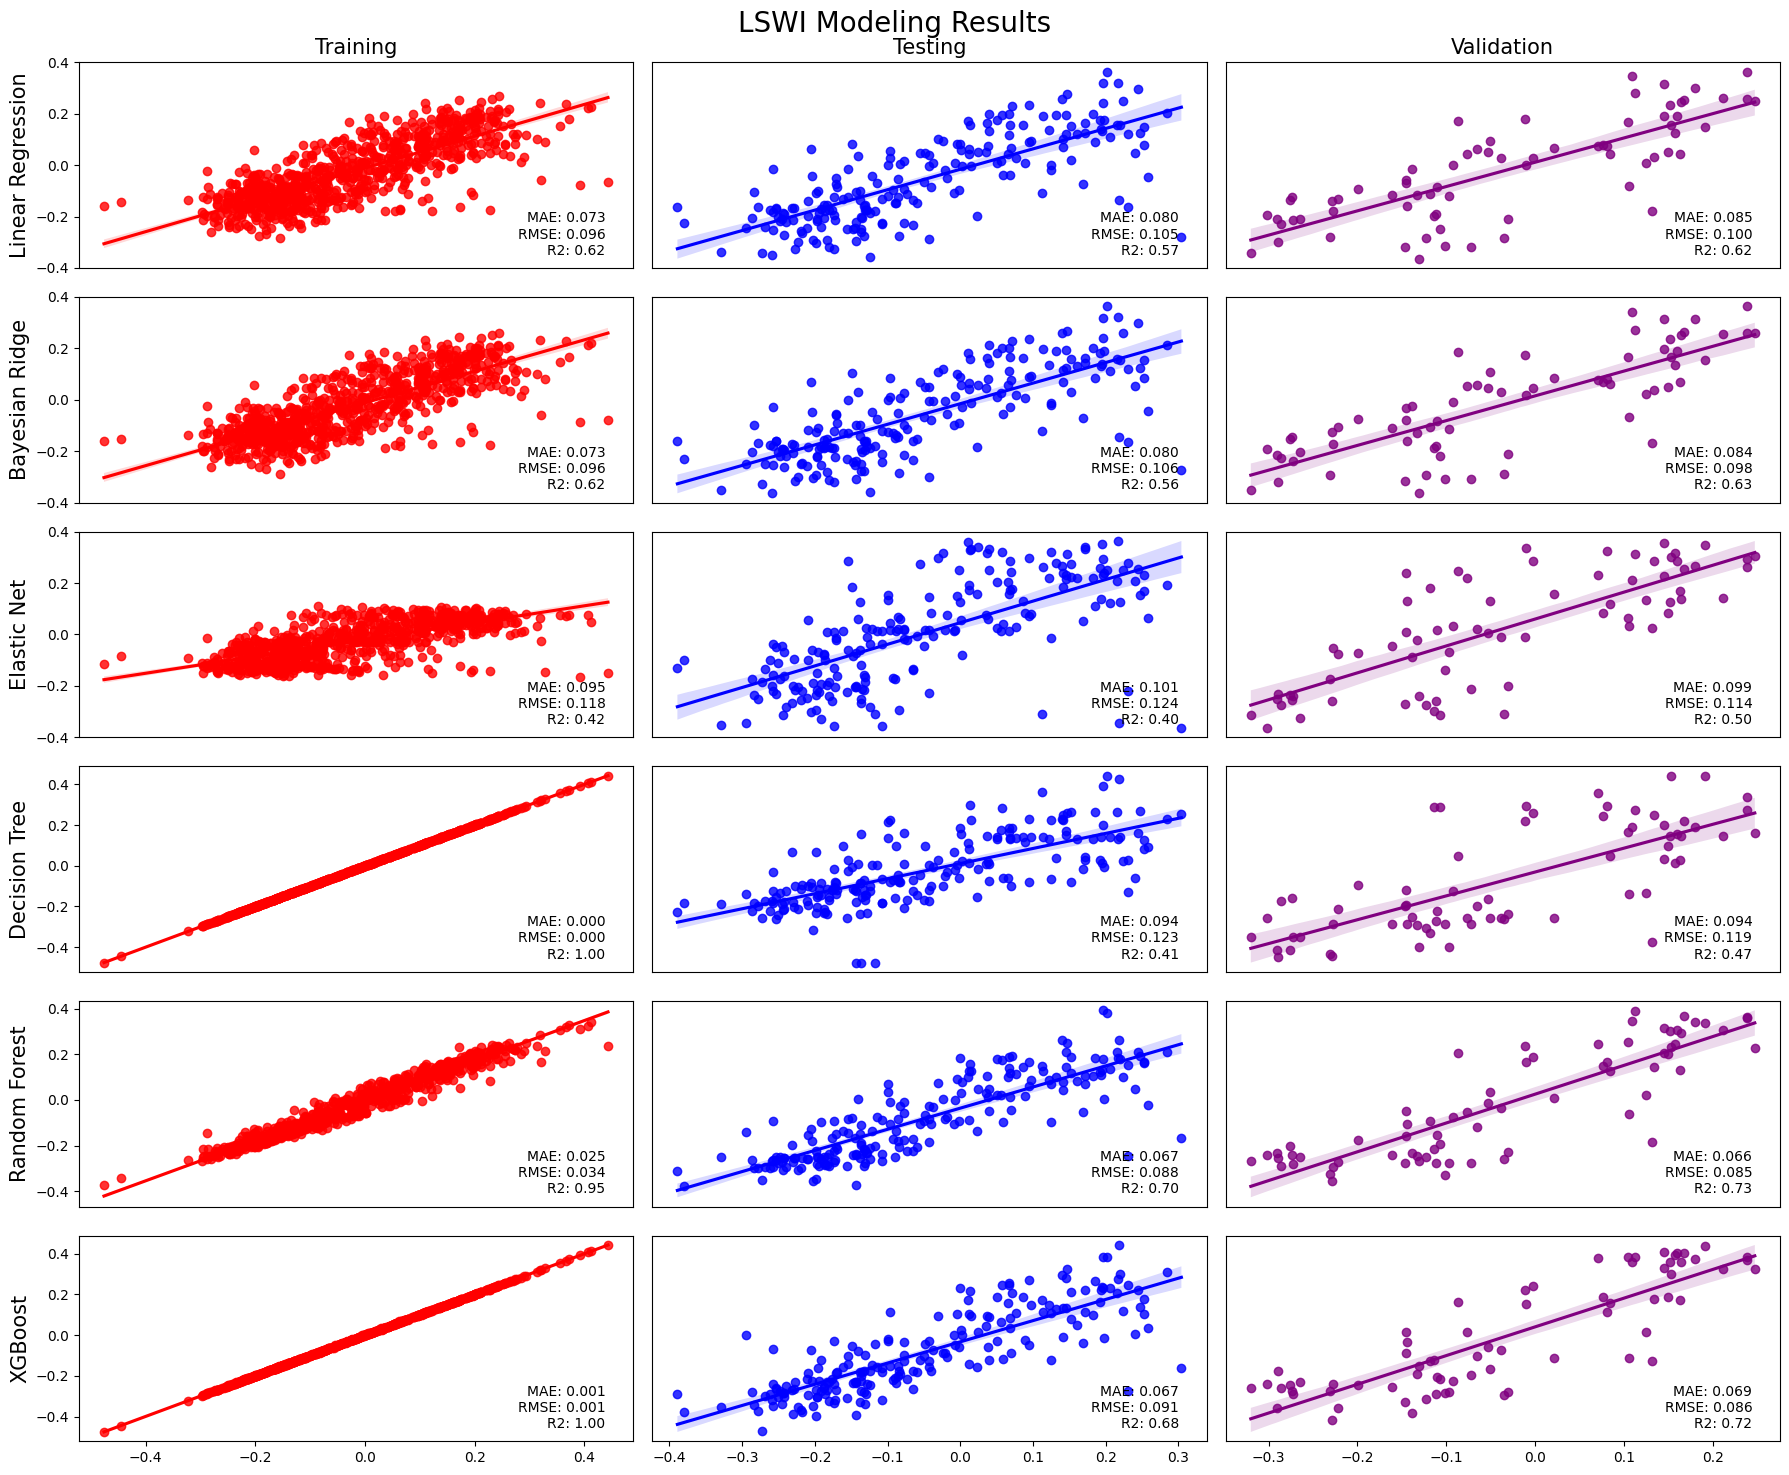

In [ ]:
# Plot 1 (Linear, Bayesian, elastic net, decision tree, random forest, XGBoost)
# LSWI without tuning
# Create a figure with 6 rows and 3 columns
fig, axs = plt.subplots(6, 3, figsize=(18, 15))

# First column (Training LSWI)

# Linear
sns.regplot(x=actual_lswi_train, y=lswi_lr_train_pred, data=lswi_df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Linear Regression', fontsize=15)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(15)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_lr = f'MAE: {lswi_mae_lr_train:.3f}\nRMSE: {lswi_rmse_lr_train:.3f}\nR2: {lswi_r2_lr_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_lr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=10)

# Bayesian Ridge
sns.regplot(x=actual_lswi_train, y=lswi_br_train_pred, data=lswi_df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Bayesian Ridge', fontsize=15)
#axs[1,0].set_title('Bayesian Ridge (Training)')
axs[1,0].title.set_size(15)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_br = f'MAE: {lswi_mae_br_train:.3f}\nRMSE: {lswi_rmse_br_train:.3f}\nR2: {lswi_r2_br_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_br, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=10)

# Elastic Net
sns.regplot(x=actual_lswi_train, y=lswi_en_train_pred, data=lswi_df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('Elastic Net', fontsize=15)
#axs[2,0].set_title('Elastic Net (Training)')
axs[2,0].title.set_size(15)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_en = f'MAE: {lswi_mae_en_train:.3f}\nRMSE: {lswi_rmse_en_train:.3f}\nR2: {lswi_r2_en_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_en, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=10)

# Decision Tree
sns.regplot(x=actual_lswi_train, y=lswi_dt_train_pred, data=lswi_df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('Decision Tree', fontsize=15)
#axs[3,0].set_title('Decision Tree (Training)')
axs[3,0].title.set_size(15)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_dt = f'MAE: {lswi_mae_dt_train:.3f}\nRMSE: {lswi_rmse_dt_train:.3f}\nR2: {lswi_r2_dt_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_dt, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=10)

# Random Forest
sns.regplot(x=actual_lswi_train, y=lswi_rf_train_pred, data=lswi_df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('Random Forest', fontsize=15)
#axs[4,0].set_title('Random Forest (Training)')
axs[4,0].title.set_size(15)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_rf = f'MAE: {lswi_mae_rf_train:.3f}\nRMSE: {lswi_rmse_rf_train:.3f}\nR2: {lswi_r2_rf_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rf, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=10)

# XGBoost
sns.regplot(x=actual_lswi_train, y=lswi_xgboost_train_pred, data=lswi_df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('XGBoost', fontsize=15)
#axs[5,0].set_title('XGBoost (Training)')
axs[5,0].title.set_size(15)
axs[5,0].set_xticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[5,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_x = f'MAE: {lswi_mae_x_train:.3f}\nRMSE: {lswi_rmse_x_train:.3f}\nR2: {lswi_r2_x_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_x, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=10)


# Second column (Testing LSWI)

# Linear
sns.regplot(x=actual_lswi_test, y=lswi_lr_test_pred, data=lswi_df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted LSWI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(15)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_lr = f'MAE: {lswi_mae_lr_test:.3f}\nRMSE: {lswi_rmse_lr_test:.3f}\nR2: {lswi_r2_lr_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_lr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=10)

# Bayesian Ridge
sns.regplot(x=actual_lswi_test, y=lswi_br_test_pred, data=lswi_df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted LSWI')
#axs[1,1].set_title('Bayesian Ridge (Testing)')
axs[1,1].title.set_size(15)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_br = f'MAE: {lswi_mae_br_test:.3f}\nRMSE: {lswi_rmse_br_test:.3f}\nR2: {lswi_r2_br_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_br, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=10)

# Elastic Net
sns.regplot(x=actual_lswi_test, y=lswi_en_test_pred, data=lswi_df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted LSWI')
#axs[2,1].set_title('Elastic Net (Testing)')
axs[2,1].title.set_size(15)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_en = f'MAE: {lswi_mae_en_test:.3f}\nRMSE: {lswi_rmse_en_test:.3f}\nR2: {lswi_r2_en_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_en, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=10)

# Decision Tree
sns.regplot(x=actual_lswi_test, y=lswi_dt_test_pred, data=lswi_df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted LSWI')
#axs[3,1].set_title('Decision Tree (Testing)')
axs[3,1].title.set_size(15)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_dt = f'MAE: {lswi_mae_dt_test:.3f}\nRMSE: {lswi_rmse_dt_test:.3f}\nR2: {lswi_r2_dt_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_dt, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=10)

# Random Forest
sns.regplot(x=actual_lswi_test, y=lswi_rf_test_pred, data=lswi_df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted LSWI')
#axs[4,1].set_title('Random Forest (Testing)')
axs[4,1].title.set_size(15)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rf = f'MAE: {lswi_mae_rf_test:.3f}\nRMSE: {lswi_rmse_rf_test:.3f}\nR2: {lswi_r2_rf_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rf, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=10)

# XGBoost
sns.regplot(x=actual_lswi_test, y=lswi_xgboost_test_pred, data=lswi_df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted LSWI')
#axs[5,1].set_title('XGBoost (Testing)')
axs[5,1].title.set_size(15)
axs[5,1].set_xticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3])
axs[5,1].set_yticks([])

test_metrics_text_x = f'MAE: {lswi_mae_x_test:.3f}\nRMSE: {lswi_rmse_x_test:.3f}\nR2: {lswi_r2_x_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_x, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=10)


# 3rd column (Validation LSWI)

# Linear
sns.regplot(x=actual_lswi_val, y=lswi_lr_val_pred, data=lswi_df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted LSWI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(15)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_lr = f'MAE: {lswi_mae_lr_val:.3f}\nRMSE: {lswi_rmse_lr_val:.3f}\nR2: {lswi_r2_lr_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_lr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=10)

# Bayesian Ridge
sns.regplot(x=actual_lswi_val, y=lswi_br_val_pred, data=lswi_df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted LSWI')
#axs[1,2].set_title('Bayesian Ridge (Validation)')
axs[1,2].title.set_size(15)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_br = f'MAE: {lswi_mae_br_val:.3f}\nRMSE: {lswi_rmse_br_val:.3f}\nR2: {lswi_r2_br_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_br, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=10)

# Elastic Net
sns.regplot(x=actual_lswi_val, y=lswi_en_val_pred, data=lswi_df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted LSWI')
#axs[2,2].set_title('Elastic Net (Validation)')
axs[2,2].title.set_size(15)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_en = f'MAE: {lswi_mae_en_val:.3f}\nRMSE: {lswi_rmse_en_val:.3f}\nR2: {lswi_r2_en_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_en, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=10)

# Decision Tree
sns.regplot(x=actual_lswi_val, y=lswi_dt_val_pred, data=lswi_df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted LSWI')
#axs[3,2].set_title('Decision Tree (Validation)')
axs[3,2].title.set_size(15)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_dt = f'MAE: {lswi_mae_dt_val:.3f}\nRMSE: {lswi_rmse_dt_val:.3f}\nR2: {lswi_r2_dt_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_dt, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=10)

# Random Forest
sns.regplot(x=actual_lswi_val, y=lswi_rf_val_pred, data=lswi_df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted LSWI')
#axs[4,2].set_title('Random Forest (Validation)')
axs[4,2].title.set_size(15)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rf = f'MAE: {lswi_mae_rf_val:.3f}\nRMSE: {lswi_rmse_rf_val:.3f}\nR2: {lswi_r2_rf_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rf, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=10)

# XGBoost
sns.regplot(x=actual_lswi_val, y=lswi_xgboost_val_pred, data=lswi_df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted LSWI')
#axs[5,2].set_title('XGBoost (Validation)')
axs[5,2].title.set_size(15)
axs[5,2].set_xticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2])
axs[5,2].set_yticks([])

val_metrics_text_x = f'MAE: {lswi_mae_x_val:.3f}\nRMSE: {lswi_rmse_x_val:.3f}\nR2: {lswi_r2_x_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_x, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=10)


plt.suptitle('LSWI Modeling Results', fontsize=20)

plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/lswi/'
plt.savefig(models_base_path + 'LSWI_without_tuning_1.png')

# Display a message indicating the file has been saved
print("Figure saved as 'LSWI_without_tuning_1.png'")

plt.show()

Figure saved as 'LSWI_without_tuning_2.png'


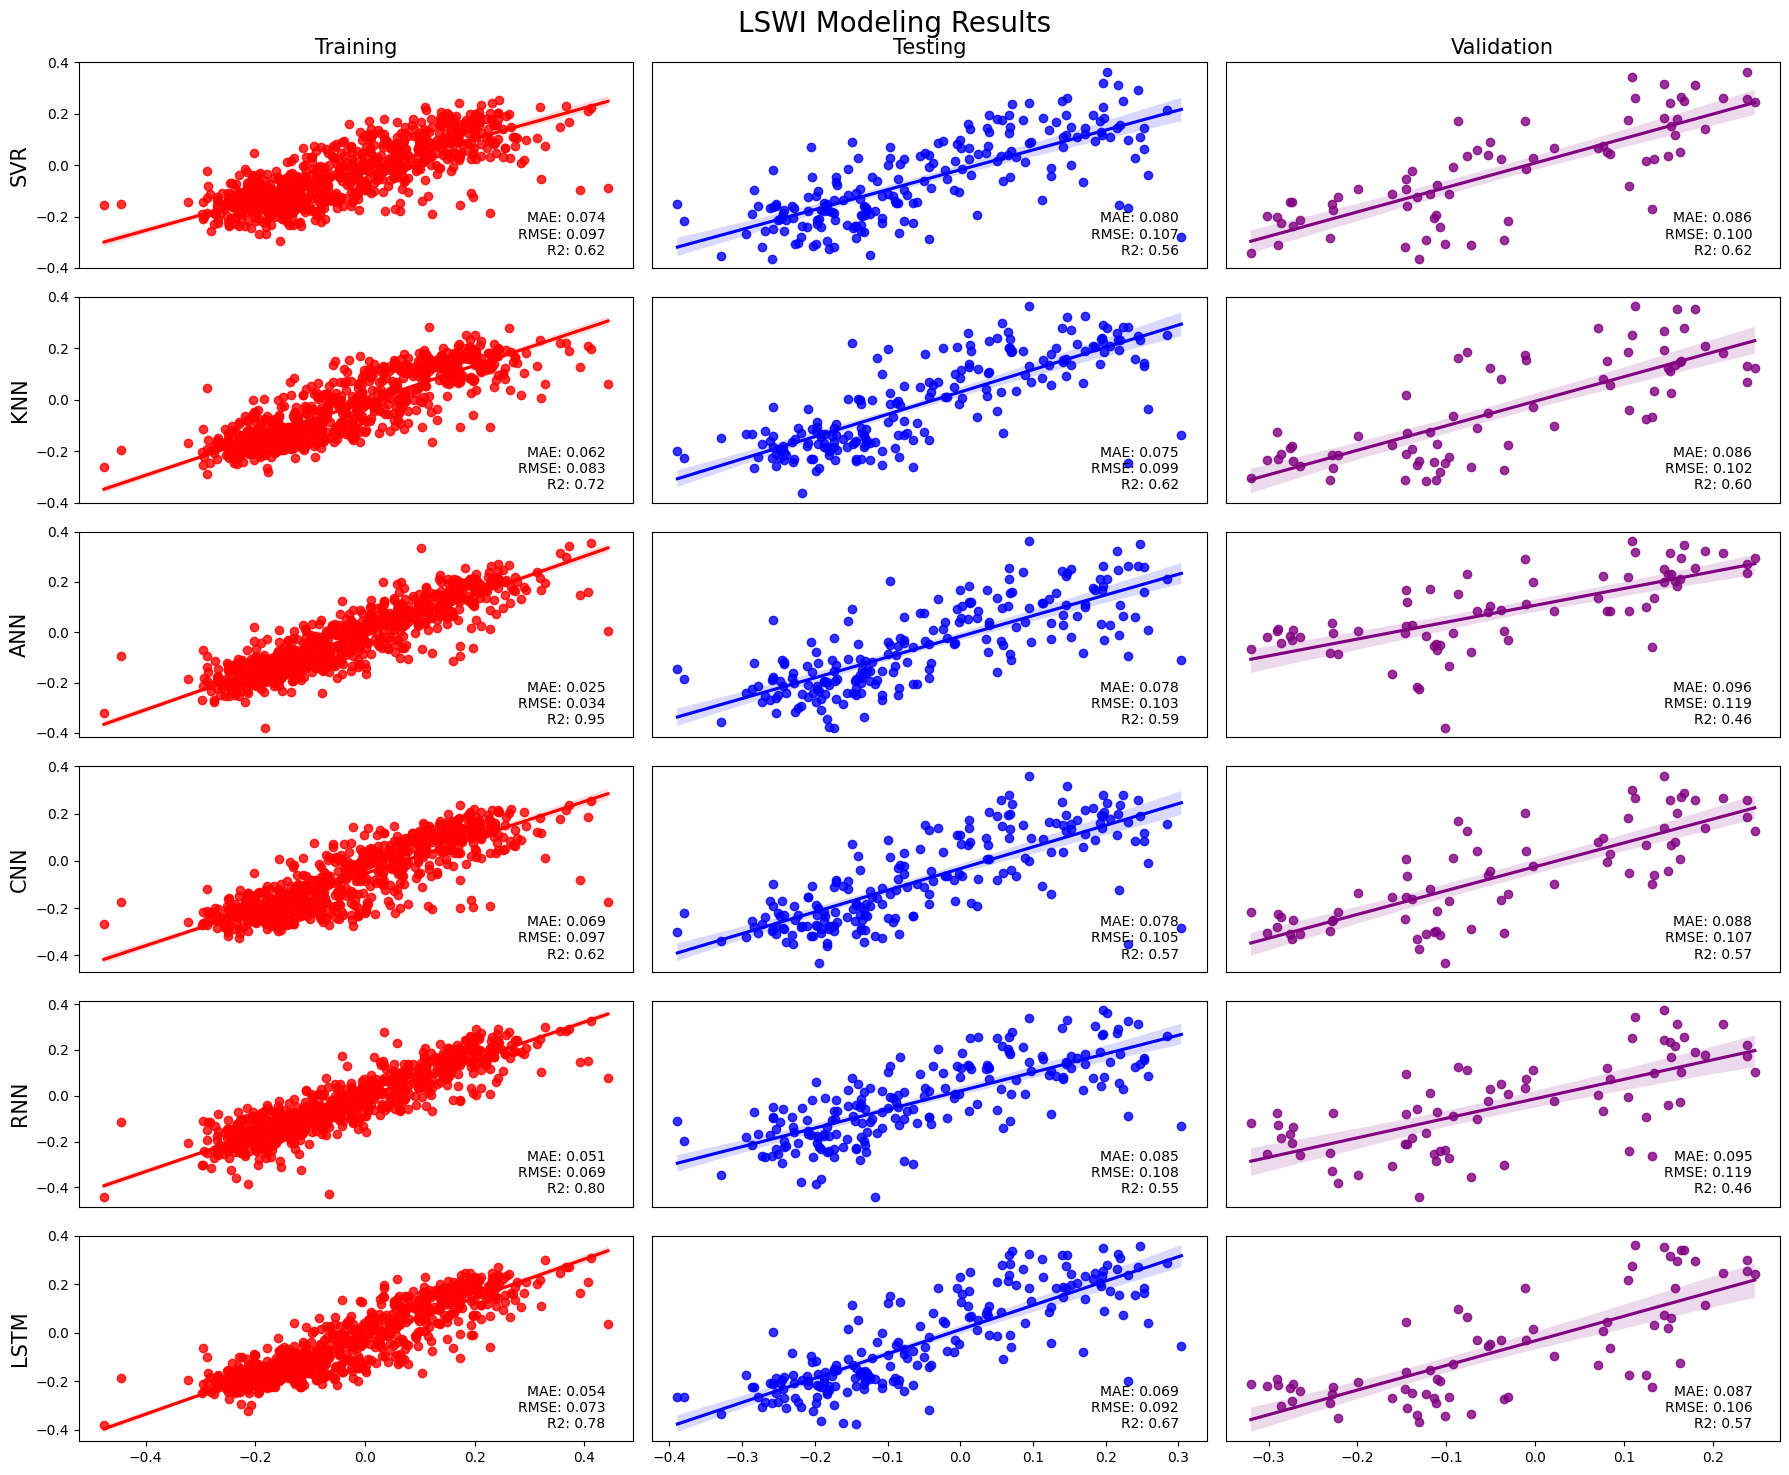

In [ ]:
# Plot 2
# LSWI without tuning
# Create a figure with 6 rows and 3 columns
fig, axs = plt.subplots(6, 3, figsize=(18, 15))

# First column (Training LSWI)

# SVR
sns.regplot(x=actual_lswi_train, y=lswi_svr_train_pred, data=lswi_df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('SVR', fontsize=15)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(15)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_svr = f'MAE: {lswi_mae_svr_train:.3f}\nRMSE: {lswi_rmse_svr_train:.3f}\nR2: {lswi_r2_svr_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_svr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=10)

# KNN
sns.regplot(x=actual_lswi_train, y=lswi_knn_train_pred, data=lswi_df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('KNN', fontsize=15)
#axs[1,0].set_title('KNN (Training)')
axs[1,0].title.set_size(15)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_knn = f'MAE: {lswi_mae_knn_train:.3f}\nRMSE: {lswi_rmse_knn_train:.3f}\nR2: {lswi_r2_knn_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_knn, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=10)

# ANN
sns.regplot(x=actual_lswi_train, y=lswi_ann_train_pred, data=lswi_df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('ANN', fontsize=15)
#axs[2,0].set_title('ANN (Training)')
axs[2,0].title.set_size(15)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_ann = f'MAE: {lswi_mae_ann_train:.3f}\nRMSE: {lswi_rmse_ann_train:.3f}\nR2: {lswi_r2_ann_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_rf, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=10)

# CNN
sns.regplot(x=actual_lswi_train, y=lswi_cnn_train_pred, data=lswi_df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('CNN', fontsize=15)
#axs[3,0].set_title('CNN (Training)')
axs[3,0].title.set_size(15)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_cnn = f'MAE: {lswi_mae_cnn_train:.3f}\nRMSE: {lswi_rmse_cnn_train:.3f}\nR2: {lswi_r2_cnn_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_cnn, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=10)

# RNN
sns.regplot(x=actual_lswi_train, y=lswi_rnn_train_pred, data=lswi_df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('RNN', fontsize=15)
#axs[4,0].set_title('RNN (Training)')
axs[4,0].title.set_size(15)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_rnn = f'MAE: {lswi_mae_rnn_train:.3f}\nRMSE: {lswi_rmse_rnn_train:.3f}\nR2: {lswi_r2_rnn_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rnn, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=10)

# LSTM
sns.regplot(x=actual_lswi_train, y=lswi_lstm_train_pred, data=lswi_df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('LSTM', fontsize=15)
#axs[5,0].set_title('LSTM (Training)')
axs[5,0].title.set_size(15)
axs[5,0].set_xticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[5,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])

train_metrics_text_lstm = f'MAE: {lswi_mae_lstm_train:.3f}\nRMSE: {lswi_rmse_lstm_train:.3f}\nR2: {lswi_r2_lstm_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_lstm, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=10)


# Second column (Testing LSWI)

# SVR
sns.regplot(x=actual_lswi_test, y=lswi_svr_test_pred, data=lswi_df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted LSWI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(15)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_svr = f'MAE: {lswi_mae_svr_test:.3f}\nRMSE: {lswi_rmse_svr_test:.3f}\nR2: {lswi_r2_svr_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_svr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=10)

# KNN
sns.regplot(x=actual_lswi_test, y=lswi_knn_test_pred, data=lswi_df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted LSWI')
#axs[1,1].set_title('KNN (Testing)')
axs[1,1].title.set_size(15)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_knn = f'MAE: {lswi_mae_knn_test:.3f}\nRMSE: {lswi_rmse_knn_test:.3f}\nR2: {lswi_r2_knn_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_knn, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=10)

# ANN
sns.regplot(x=actual_lswi_test, y=lswi_ann_test_pred, data=lswi_df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted LSWI')
#axs[2,1].set_title('ANN (Testing)')
axs[2,1].title.set_size(15)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_ann = f'MAE: {lswi_mae_ann_test:.3f}\nRMSE: {lswi_rmse_ann_test:.3f}\nR2: {lswi_r2_ann_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_ann, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=10)

# CNN
sns.regplot(x=actual_lswi_test, y=lswi_cnn_test_pred, data=lswi_df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted LSWI')
#axs[3,1].set_title('CNN (Testing)')
axs[3,1].title.set_size(15)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_cnn = f'MAE: {lswi_mae_cnn_test:.3f}\nRMSE: {lswi_rmse_cnn_test:.3f}\nR2: {lswi_r2_cnn_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_cnn, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=10)

# RNN
sns.regplot(x=actual_lswi_test, y=lswi_rnn_test_pred, data=lswi_df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted LSWI')
#axs[4,1].set_title('RNN (Testing)')
axs[4,1].title.set_size(15)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rnn = f'MAE: {lswi_mae_rnn_test:.3f}\nRMSE: {lswi_rmse_rnn_test:.3f}\nR2: {lswi_r2_rnn_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rnn, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=10)

# LSTM
sns.regplot(x=actual_lswi_test, y=lswi_lstm_test_pred, data=lswi_df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted LSWI')
#axs[5,1].set_title('LSTM (Testing)')
axs[5,1].title.set_size(15)
axs[5,1].set_xticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3])
axs[5,1].set_yticks([])

test_metrics_text_lstm = f'MAE: {lswi_mae_lstm_test:.3f}\nRMSE: {lswi_rmse_lstm_test:.3f}\nR2: {lswi_r2_lstm_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_lstm, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=10)


# 3rd column (Validation LSWI)

# SVR
sns.regplot(x=actual_lswi_val, y=lswi_svr_val_pred, data=lswi_df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted LSWI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(15)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_svr = f'MAE: {lswi_mae_svr_val:.3f}\nRMSE: {lswi_rmse_svr_val:.3f}\nR2: {lswi_r2_svr_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_svr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=10)

# KNN
sns.regplot(x=actual_lswi_val, y=lswi_knn_val_pred, data=lswi_df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted LSWI')
#axs[1,2].set_title('KNN (Validation)')
axs[1,2].title.set_size(15)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_knn = f'MAE: {lswi_mae_knn_val:.3f}\nRMSE: {lswi_rmse_knn_val:.3f}\nR2: {lswi_r2_knn_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_knn, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=10)

# ANN
sns.regplot(x=actual_lswi_val, y=lswi_ann_val_pred, data=lswi_df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted LSWI')
#axs[2,2].set_title('ANN (Validation)')
axs[2,2].title.set_size(15)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_ann = f'MAE: {lswi_mae_ann_val:.3f}\nRMSE: {lswi_rmse_ann_val:.3f}\nR2: {lswi_r2_ann_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_ann, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=10)

# CNN
sns.regplot(x=actual_lswi_val, y=lswi_cnn_val_pred, data=lswi_df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted LSWI')
#axs[3,2].set_title('CNN (Validation)')
axs[3,2].title.set_size(15)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_cnn = f'MAE: {lswi_mae_cnn_val:.3f}\nRMSE: {lswi_rmse_cnn_val:.3f}\nR2: {lswi_r2_cnn_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_cnn, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=10)

# RNN
sns.regplot(x=actual_lswi_val, y=lswi_rnn_val_pred, data=lswi_df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted LSWI')
#axs[4,2].set_title('RNN (Validation)')
axs[4,2].title.set_size(15)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rnn = f'MAE: {lswi_mae_rnn_val:.3f}\nRMSE: {lswi_rmse_rnn_val:.3f}\nR2: {lswi_r2_rnn_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rnn, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=10)

# LSTM
sns.regplot(x=actual_lswi_val, y=lswi_lstm_val_pred, data=lswi_df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted LSWI')
#axs[5,2].set_title('LSTM (Validation)')
axs[5,2].title.set_size(15)
axs[5,2].set_xticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2])
axs[5,2].set_yticks([])

val_metrics_text_lstm = f'MAE: {lswi_mae_lstm_val:.3f}\nRMSE: {lswi_rmse_lstm_val:.3f}\nR2: {lswi_r2_lstm_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_lstm, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=10)


plt.suptitle('LSWI Modeling Results', fontsize=20)

plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/lswi/'
plt.savefig(models_base_path + 'LSWI_without_tuning_2.png')

# Display a message indicating the file has been saved
print("Figure saved as 'LSWI_without_tuning_2.png'")

plt.show()



### LSWI - Tuning

In [ ]:
# Plot 1
# LSWI with tuning (6x3)
fig, axs = plt.subplots(6, 3, figsize=(70, 65))

# First column (Training LSWI)

# Linear
sns.regplot(x=actual_lswi_train, y=lswi_lr_tuned_train_pred, data=lswi_df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Linear Regression', fontsize=70)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(70)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[0,0].tick_params(axis='y', labelsize=60)

train_metrics_text_lr = f'MAE: {lswi_mae_lr_tuned_train:.3f}\nRMSE: {lswi_rmse_lr_tuned_train:.3f}\nR2: {lswi_r2_lr_tuned_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_lr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=60)

# Bayesian Ridge
sns.regplot(x=actual_lswi_train, y=lswi_br_tuned_train_pred, data=lswi_df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Bayesian Ridge', fontsize=70)
#axs[1,0].set_title('Bayesian Ridge (Training)')
axs[1,0].title.set_size(70)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[1,0].tick_params(axis='y', labelsize=60)

train_metrics_text_br = f'MAE: {lswi_mae_br_tuned_train:.3f}\nRMSE: {lswi_rmse_br_tuned_train:.3f}\nR2: {lswi_r2_br_tuned_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_br, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=60)

# Elastic Net
sns.regplot(x=actual_lswi_train, y=lswi_en_tuned_train_pred, data=lswi_df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('Elastic Net', fontsize=70)
#axs[2,0].set_title('Elastic Net (Training)')
axs[2,0].title.set_size(70)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[2,0].tick_params(axis='y', labelsize=60)

train_metrics_text_en = f'MAE: {lswi_mae_en_tuned_train:.3f}\nRMSE: {lswi_rmse_en_tuned_train:.3f}\nR2: {lswi_r2_en_tuned_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_en, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=60)

# Decision Tree
sns.regplot(x=actual_lswi_train, y=lswi_dt_train_pred, data=lswi_df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('Decision Tree*', fontsize=70)
#axs[3,0].set_title('Decision Tree (Training)*')
axs[3,0].title.set_size(70)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[3,0].tick_params(axis='y', labelsize=60)

train_metrics_text_dt = f'MAE: {lswi_mae_dt_train:.3f}\nRMSE: {lswi_rmse_dt_train:.3f}\nR2: {lswi_r2_dt_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_dt, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=60)

# Random Forest
sns.regplot(x=actual_lswi_train, y=lswi_rf_tuned_train_pred, data=lswi_df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('Random Forest', fontsize=70)
#axs[4,0].set_title('Random Forest (Training)')
axs[4,0].title.set_size(70)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[4,0].tick_params(axis='y', labelsize=60)

train_metrics_text_rf = f'MAE: {lswi_mae_rf_tuned_train:.3f}\nRMSE: {lswi_rmse_rf_tuned_train:.3f}\nR2: {lswi_r2_rf_tuned_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rf, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=60)

# XGBoost
sns.regplot(x=actual_lswi_train, y=lswi_xgboost_tuned_train_pred, data=lswi_df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('XGBoost', fontsize=70)
#axs[5,0].set_title('XGBoost (Training)')
axs[5,0].title.set_size(70)
axs[5,0].set_xticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[5,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[5,0].tick_params(axis='x', labelsize=60)
axs[5,0].tick_params(axis='y', labelsize=60)

train_metrics_text_x = f'MAE: {lswi_mae_x_tuned_train:.3f}\nRMSE: {lswi_rmse_x_tuned_train:.3f}\nR2: {lswi_r2_x_tuned_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_x, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=60)


# Second column (Testing LSWI)

# Linear
sns.regplot(x=actual_lswi_test, y=lswi_lr_tuned_test_pred, data=lswi_df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted LSWI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(70)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_lr = f'MAE: {lswi_mae_lr_tuned_test:.3f}\nRMSE: {lswi_rmse_lr_tuned_test:.3f}\nR2: {lswi_r2_lr_tuned_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_lr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=60)

# Bayesian Ridge
sns.regplot(x=actual_lswi_test, y=lswi_br_tuned_test_pred, data=lswi_df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted LSWI')
#axs[1,1].set_title('Bayesian Ridge (Testing)')
axs[1,1].title.set_size(70)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_br = f'MAE: {lswi_mae_br_tuned_test:.3f}\nRMSE: {lswi_rmse_br_tuned_test:.3f}\nR2: {lswi_r2_br_tuned_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_br, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=60)

# Elastic Net
sns.regplot(x=actual_lswi_test, y=lswi_en_tuned_test_pred, data=lswi_df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted LSWI')
#axs[2,1].set_title('Elastic Net (Testing)')
axs[2,1].title.set_size(70)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_en = f'MAE: {lswi_mae_en_tuned_test:.3f}\nRMSE: {lswi_rmse_en_tuned_test:.3f}\nR2: {lswi_r2_en_tuned_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_en, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=60)

# Decision Tree
sns.regplot(x=actual_lswi_test, y=lswi_dt_test_pred, data=lswi_df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted LSWI')
#axs[3,1].set_title('Decision Tree (Testing)*')
axs[3,1].title.set_size(70)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_dt = f'MAE: {lswi_mae_dt_test:.3f}\nRMSE: {lswi_rmse_dt_test:.3f}\nR2: {lswi_r2_dt_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_dt, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=60)

# Random Forest
sns.regplot(x=actual_lswi_test, y=lswi_rf_tuned_test_pred, data=lswi_df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted LSWI')
#axs[4,1].set_title('Random Forest (Testing)')
axs[4,1].title.set_size(70)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rf = f'MAE: {lswi_mae_rf_tuned_test:.3f}\nRMSE: {lswi_rmse_rf_tuned_test:.3f}\nR2: {lswi_r2_rf_tuned_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rf, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=60)

# XGBoost
sns.regplot(x=actual_lswi_test, y=lswi_xgboost_tuned_test_pred, data=lswi_df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted LSWI', fontsize=60)
#axs[5,1].set_title('XGBoost (Testing)')
axs[5,1].title.set_size(70)
axs[5,1].set_xticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3])
axs[5,1].set_yticks([])
axs[5,1].tick_params(axis='x', labelsize=60)

test_metrics_text_x = f'MAE: {lswi_mae_x_tuned_test:.3f}\nRMSE: {lswi_rmse_x_tuned_test:.3f}\nR2: {lswi_r2_x_tuned_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_x, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=60)


# 3rd column (Validation LSWI)

# Linear
sns.regplot(x=actual_lswi_val, y=lswi_lr_tuned_val_pred, data=lswi_df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted LSWI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(70)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_lr = f'MAE: {lswi_mae_lr_tuned_val:.3f}\nRMSE: {lswi_rmse_lr_tuned_val:.3f}\nR2: {lswi_r2_lr_tuned_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_lr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=60)

# Bayesian Ridge
sns.regplot(x=actual_lswi_val, y=lswi_br_tuned_val_pred, data=lswi_df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted LSWI')
#axs[1,2].set_title('Bayesian Ridge (Validation)')
axs[1,2].title.set_size(70)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_br = f'MAE: {lswi_mae_br_tuned_val:.3f}\nRMSE: {lswi_rmse_br_tuned_val:.3f}\nR2: {lswi_r2_br_tuned_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_br, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=60)

# Elastic Net
sns.regplot(x=actual_lswi_val, y=lswi_en_tuned_val_pred, data=lswi_df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted LSWI')
#axs[2,2].set_title('Elastic Net (Validation)')
axs[2,2].title.set_size(70)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_en = f'MAE: {lswi_mae_en_tuned_val:.3f}\nRMSE: {lswi_rmse_en_tuned_val:.3f}\nR2: {lswi_r2_en_tuned_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_en, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=60)

# Decision Tree
sns.regplot(x=actual_lswi_val, y=lswi_dt_val_pred, data=lswi_df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted LSWI')
#axs[3,2].set_title('Decision Tree (Validation)*')
axs[3,2].title.set_size(70)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_dt = f'MAE: {lswi_mae_dt_val:.3f}\nRMSE: {lswi_rmse_dt_val:.3f}\nR2: {lswi_r2_dt_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_dt, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=60)

# Random Forest
sns.regplot(x=actual_lswi_val, y=lswi_rf_tuned_val_pred, data=lswi_df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted LSWI')
#axs[4,2].set_title('Random Forest (Validation)')
axs[4,2].title.set_size(70)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rf = f'MAE: {lswi_mae_rf_tuned_val:.3f}\nRMSE: {lswi_rmse_rf_tuned_val:.3f}\nR2: {lswi_r2_rf_tuned_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rf, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=60)

# XGBoost
sns.regplot(x=actual_lswi_val, y=lswi_xgboost_tuned_val_pred, data=lswi_df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted LSWI', fontsize=60)
#axs[5,2].set_title('XGBoost (Validation)')
axs[5,2].title.set_size(70)
axs[5,2].set_xticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2])
axs[5,2].set_yticks([])
axs[5,2].tick_params(axis='x', labelsize=60)

val_metrics_text_x = f'MAE: {lswi_mae_x_tuned_val:.3f}\nRMSE: {lswi_rmse_x_tuned_val:.3f}\nR2: {lswi_r2_x_tuned_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_x, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=60)


plt.suptitle('LSWI Modeling Results', fontsize=80, y=1)

plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/lswi/'
plt.savefig(models_base_path + 'LSWI_with_tuning_1.png')

# Display a message indicating the file has been saved
print("Figure saved as 'LSWI_with_tuning_1.png'")

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Plot 2
# LSWI with tuning (6x3)
fig, axs = plt.subplots(6, 3, figsize=(70, 65))

# First column (Training LSWI)

# SVR
sns.regplot(x=actual_lswi_train, y=lswi_svr_tuned_train_pred, data=lswi_df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Support Vector', fontsize=70)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(70)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[0,0].tick_params(axis='y', labelsize=60)

train_metrics_text_svr = f'MAE: {lswi_mae_svr_tuned_train:.3f}\nRMSE: {lswi_rmse_svr_tuned_train:.3f}\nR2: {lswi_r2_svr_tuned_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_svr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=60)

# KNN
sns.regplot(x=actual_lswi_train, y=lswi_knn_tuned_train_pred, data=lswi_df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('KNN', fontsize=70)
#axs[1,0].set_title('KNN (Training)')
axs[1,0].title.set_size(70)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[1,0].tick_params(axis='y', labelsize=60)

train_metrics_text_knn = f'MAE: {lswi_mae_knn_tuned_train:.3f}\nRMSE: {lswi_rmse_knn_tuned_train:.3f}\nR2: {lswi_r2_knn_tuned_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_knn, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=60)

# ANN
sns.regplot(x=actual_lswi_train, y=lswi_ann_tuned_train_pred, data=lswi_df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('ANN', fontsize=70)
#axs[2,0].set_title('ANN (Training)')
axs[2,0].title.set_size(70)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[2,0].tick_params(axis='y', labelsize=60)

train_metrics_text_ann = f'MAE: {lswi_mae_ann_tuned_train:.3f}\nRMSE: {lswi_rmse_ann_tuned_train:.3f}\nR2: {lswi_r2_ann_tuned_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_ann, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=60)

# CNN
sns.regplot(x=actual_lswi_train, y=lswi_cnn_tuned_train_pred, data=lswi_df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('CNN', fontsize=70)
#axs[3,0].set_title('CNN (Training)*')
axs[3,0].title.set_size(70)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[3,0].tick_params(axis='y', labelsize=60)

train_metrics_text_cnn = f'MAE: {lswi_mae_cnn_tuned_train:.3f}\nRMSE: {lswi_rmse_cnn_tuned_train:.3f}\nR2: {lswi_r2_cnn_tuned_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_cnn, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=60)

# RNN
sns.regplot(x=actual_lswi_train, y=lswi_rnn_tuned_train_pred, data=lswi_df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('RNN', fontsize=70)
#axs[4,0].set_title('RNN (Training)')
axs[4,0].title.set_size(70)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[4,0].tick_params(axis='y', labelsize=60)

train_metrics_text_rnn = f'MAE: {lswi_mae_rnn_tuned_train:.3f}\nRMSE: {lswi_rmse_rnn_tuned_train:.3f}\nR2: {lswi_r2_rnn_tuned_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rnn, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=60)

# LSTM
sns.regplot(x=actual_lswi_train, y=lswi_lstm_tuned_train_pred, data=lswi_df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('LSTM', fontsize=70)
#axs[5,0].set_title('LSTM (Training)')
axs[5,0].title.set_size(70)
axs[5,0].set_xticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[5,0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4])
axs[5,0].tick_params(axis='x', labelsize=60)
axs[5,0].tick_params(axis='y', labelsize=60)

train_metrics_text_lstm = f'MAE: {lswi_mae_lstm_tuned_train:.3f}\nRMSE: {lswi_rmse_lstm_tuned_train:.3f}\nR2: {lswi_r2_lstm_tuned_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_lstm, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=60)


# Second column (Testing LSWI)

# SVR
sns.regplot(x=actual_lswi_test, y=lswi_svr_tuned_test_pred, data=lswi_df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted LSWI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(70)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_svr = f'MAE: {lswi_mae_svr_tuned_test:.3f}\nRMSE: {lswi_rmse_svr_tuned_test:.3f}\nR2: {lswi_r2_svr_tuned_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_svr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=60)

# KNN
sns.regplot(x=actual_lswi_test, y=lswi_knn_tuned_test_pred, data=lswi_df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted LSWI')
#axs[1,1].set_title('KNN (Testing)')
axs[1,1].title.set_size(70)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_knn = f'MAE: {lswi_mae_knn_tuned_test:.3f}\nRMSE: {lswi_rmse_knn_tuned_test:.3f}\nR2: {lswi_r2_knn_tuned_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_knn, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=60)

# ANN
sns.regplot(x=actual_lswi_test, y=lswi_ann_tuned_test_pred, data=lswi_df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted LSWI')
#axs[2,1].set_title('ANN (Testing)')
axs[2,1].title.set_size(70)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_ann = f'MAE: {lswi_mae_ann_tuned_test:.3f}\nRMSE: {lswi_rmse_ann_tuned_test:.3f}\nR2: {lswi_r2_ann_tuned_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_ann, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=60)

# CNN
sns.regplot(x=actual_lswi_test, y=lswi_cnn_tuned_test_pred, data=lswi_df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted LSWI')
#axs[3,1].set_title('CNN (Testing)')
axs[3,1].title.set_size(70)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_cnn = f'MAE: {lswi_mae_cnn_tuned_test:.3f}\nRMSE: {lswi_rmse_cnn_tuned_test:.3f}\nR2: {lswi_r2_cnn_tuned_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_cnn, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=60)

# RNN
sns.regplot(x=actual_lswi_test, y=lswi_rnn_tuned_test_pred, data=lswi_df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted LSWI')
#axs[4,1].set_title('RNN (Testing)')
axs[4,1].title.set_size(70)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rnn = f'MAE: {lswi_mae_rnn_tuned_test:.3f}\nRMSE: {lswi_rmse_rnn_tuned_test:.3f}\nR2: {lswi_r2_rnn_tuned_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rnn, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=60)

# LSTM
sns.regplot(x=actual_lswi_test, y=lswi_lstm_tuned_test_pred, data=lswi_df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted LSWI', fontsize=60)
#axs[5,1].set_title('LSTM (Testing)')
axs[5,1].title.set_size(70)
axs[5,1].set_xticks([-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3])
axs[5,1].set_yticks([])
axs[5,1].tick_params(axis='x', labelsize=60)

test_metrics_text_lstm = f'MAE: {lswi_mae_lstm_tuned_test:.3f}\nRMSE: {lswi_rmse_lstm_tuned_test:.3f}\nR2: {lswi_r2_lstm_tuned_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_lstm, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=60)


# 3rd column (Validation LSWI)

# SVR
sns.regplot(x=actual_lswi_val, y=lswi_svr_tuned_val_pred, data=lswi_df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted LSWI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(70)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_svr = f'MAE: {lswi_mae_svr_tuned_val:.3f}\nRMSE: {lswi_rmse_svr_tuned_val:.3f}\nR2: {lswi_r2_svr_tuned_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_svr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=60)

# KNN
sns.regplot(x=actual_lswi_val, y=lswi_knn_tuned_val_pred, data=lswi_df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted LSWI')
#axs[1,2].set_title('KNN (Validation)')
axs[1,2].title.set_size(70)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_knn = f'MAE: {lswi_mae_knn_tuned_val:.3f}\nRMSE: {lswi_rmse_knn_tuned_val:.3f}\nR2: {lswi_r2_knn_tuned_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_knn, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=60)

# ANN
sns.regplot(x=actual_lswi_val, y=lswi_ann_tuned_val_pred, data=lswi_df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted LSWI')
#axs[2,2].set_title('ANN (Validation)')
axs[2,2].title.set_size(70)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_ann = f'MAE: {lswi_mae_ann_tuned_val:.3f}\nRMSE: {lswi_rmse_ann_tuned_val:.3f}\nR2: {lswi_r2_ann_tuned_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_ann, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=60)

# CNN
sns.regplot(x=actual_lswi_val, y=lswi_cnn_tuned_val_pred, data=lswi_df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted LSWI')
#axs[3,2].set_title('CNN (Validation)')
axs[3,2].title.set_size(70)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_cnn = f'MAE: {lswi_mae_cnn_tuned_val:.3f}\nRMSE: {lswi_rmse_cnn_tuned_val:.3f}\nR2: {lswi_r2_cnn_tuned_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_cnn, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=60)

# RNN
sns.regplot(x=actual_lswi_val, y=lswi_rnn_tuned_val_pred, data=lswi_df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted LSWI')
#axs[4,2].set_title('RNN (Validation)')
axs[4,2].title.set_size(70)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rnn = f'MAE: {lswi_mae_rnn_tuned_val:.3f}\nRMSE: {lswi_rmse_rnn_tuned_val:.3f}\nR2: {lswi_r2_rnn_tuned_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rnn, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=60)

# LSTM
sns.regplot(x=actual_lswi_val, y=lswi_lstm_tuned_val_pred, data=lswi_df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted LSWI', fontsize=60)
#axs[5,2].set_title('LSTM (Validation)')
axs[5,2].title.set_size(70)
axs[5,2].set_xticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2])
axs[5,2].set_yticks([])
axs[5,2].tick_params(axis='x', labelsize=60)

val_metrics_text_lstm = f'MAE: {lswi_mae_lstm_tuned_val:.3f}\nRMSE: {lswi_rmse_lstm_tuned_val:.3f}\nR2: {lswi_r2_lstm_tuned_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_lstm, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=60)


plt.suptitle('LSWI Modeling Results', fontsize=80, y=1)

plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/lswi/'
plt.savefig(models_base_path + 'LSWI_with_tuning_2.png')

# Display a message indicating the file has been saved
print("Figure saved as 'LSWI_with_tuning_2.png'")

plt.show()

Output hidden; open in https://colab.research.google.com to view.